In [2]:
# import everything for a linear regression model
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
# plt
import matplotlib.pyplot as plt

import numpy as np
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
def reload_df():
    return pd.read_csv('cleaned_data.csv')

reload_df()

Time     Res_Freq  Amplitude   Phase  Sample_number  Peak  \
0       833.900697  1018.846491      0.210   86.46              6     1   
1      1413.399842  1023.293676      0.116   82.15              7     0   
2       706.900433  1034.926293      0.230   85.26              7     0   
3       816.100678  1036.716665      0.182   91.56              6     1   
4       937.850642  1040.173647      0.222   85.60             11     1   
...            ...          ...        ...     ...            ...   ...   
10355   724.450436  4242.385585      0.804  -98.87              7     0   
10356   112.250421  4247.288004      0.816  -98.51              7     0   
10357  1010.703809  4292.083372      0.560 -104.01              9     1   
10358   724.550442  4336.678654      0.562 -108.95              7     0   
10359   724.650448  4336.678654      0.562 -108.95              7     0   

       Before_compression  After_compression  Compression_ratio  \
0                   13.99               11.2           1.249107   
1                   14.33               11.3           1.268142   
2                   14.33               11.3           1.268142   
3                   13.99               11.2           1.249107   
4                   14.33               11.3           1.268142   
...                   ...                ...                ...   
10355               14.33               11.3           1.268142   
10356               14.33               11.3           1.268142   
10357               12.80               10.3           1.242718   
10358               14.33               11.3           1.268142   
10359               14.33               11.3           1.268142   

       Compression_time  
0            170.050727  
1            370.401184  
2            370.401184  
3            170.050727  
4            217.408437  
...                 ...  
10355        370.401184  
10356        370.401184  
10357        250.944352  
10358        370.401184  
10359        370.401184  

[10360 rows x 10 columns]

In [4]:
# df = pd.DataFrame(columns=["Time", "Res_Freq", "Amplitude", "Phase", "Sample_number", "Peak", "Before_compression", "After_compression", "Compression_ratio", "Compression_time"])
# create a model for linear regression on the data. you need to use the following columns:
# "Res_Freq", "Amplitude", "compression_ratio"
df = reload_df()
X = df[["Res_Freq", "Amplitude", "Compression_ratio"]]
y = df["Compression_time"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),  # 3 input features (Res_Freq, Amplitude, Compression_ratio)
    tf.keras.layers.Dense(1)  # Output layer with one neuron for the prediction (Compression_time)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")



Epoch 1/10


c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


234/234 [==============================] - 1s 1ms/step - loss: 55560.1250 - val_loss: 54099.2852
Epoch 2/10
234/234 [==============================] - 0s 755us/step - loss: 55435.2461 - val_loss: 53975.6719
Epoch 3/10
234/234 [==============================] - 0s 880us/step - loss: 55310.9688 - val_loss: 53852.6094
Epoch 4/10
234/234 [==============================] - 0s 755us/step - loss: 55187.0000 - val_loss: 53730.2148
Epoch 5/10
234/234 [==============================] - 0s 755us/step - loss: 55062.9492 - val_loss: 53607.4492
Epoch 6/10
234/234 [==============================] - 0s 738us/step - loss: 54939.4414 - val_loss: 53485.8203
Epoch 7/10
234/234 [==============================] - 0s 734us/step - loss: 54815.6797 - val_loss: 53362.9609
Epoch 8/10
234/234 [==============================] - 0s 747us/step - loss: 54692.5586 - val_loss: 53241.4219
Epoch 9/10
234/234 [==============================] - 0s 773us/step - loss: 54569.6914 - val_loss: 53120.6992
Epoch 10/10
65/65 [====

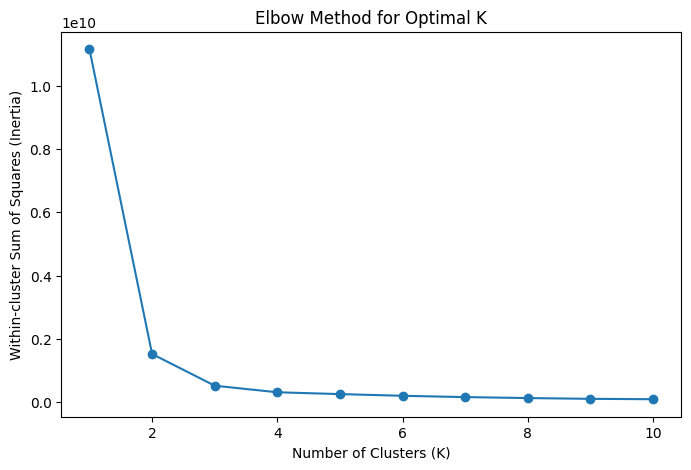

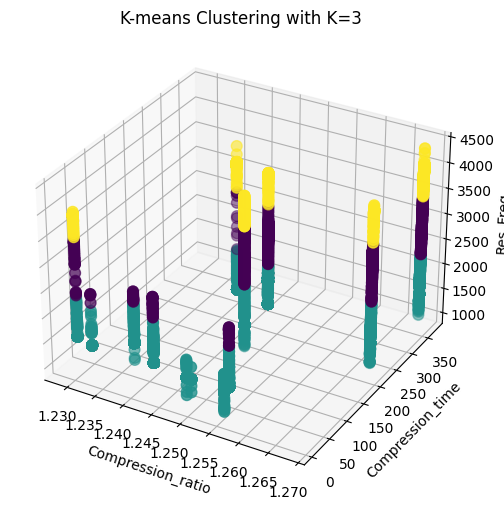

In [23]:
######### clustering :

# Assuming you have already loaded the data into a DataFrame called 'df'
# Preprocess the data if needed (e.g., handle missing values)

# what to plot 
plot_cols = ["Compression_ratio", "Compression_time", "Res_Freq"]
# Select the features for clustering
df = reload_df()    
X = df[plot_cols]

# Determine the optimal number of clusters using the "elbow method"
# In the elbow method, we plot the within-cluster sum of squares (inertia) for different values of K (number of clusters).
# The "elbow" point on the plot indicates the optimal K value where increasing K further doesn't provide significant reduction in inertia.
inertia_values = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()
K_nb_Clusters = 3
# Based on the elbow curve, you can select the optimal number of clusters, let's say K=3
# Perform K-means clustering with K=3
kmeans = KMeans(n_clusters=K_nb_Clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

# Visualize the clusters in 3D space (you can modify this based on the number of features)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# using plot_cols scatter and
ax.scatter(df[plot_cols[0]], df[plot_cols[1]], df[plot_cols[2]], c=df['Cluster'], s=60)
ax.set_xlabel(plot_cols[0])
ax.set_ylabel(plot_cols[1])
ax.set_zlabel(plot_cols[2])
plt.title('K-means Clustering with K='+str(K_nb_Clusters))


plt.show()


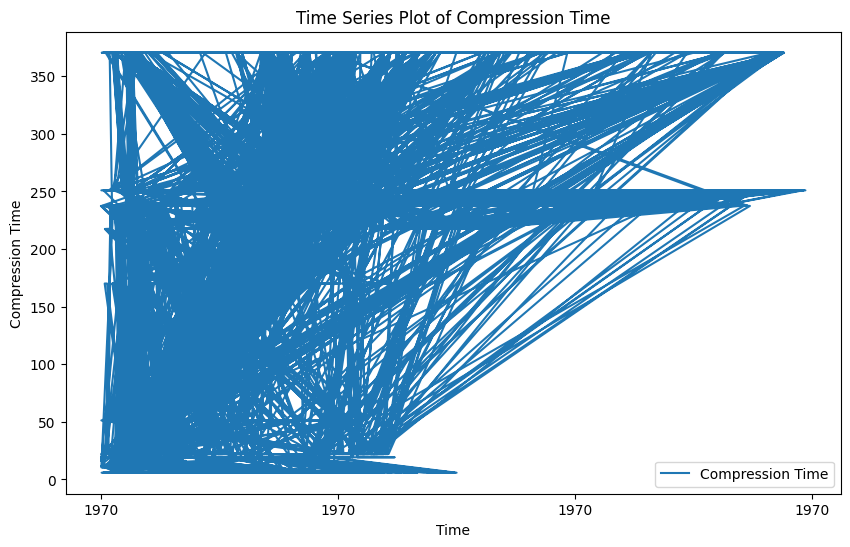

c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

Mean Squared Error: 5449.812099992173


c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\maxim\AppData\Local\Temp\ipykernel_18312\3759104533.py:45: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, closed='right')


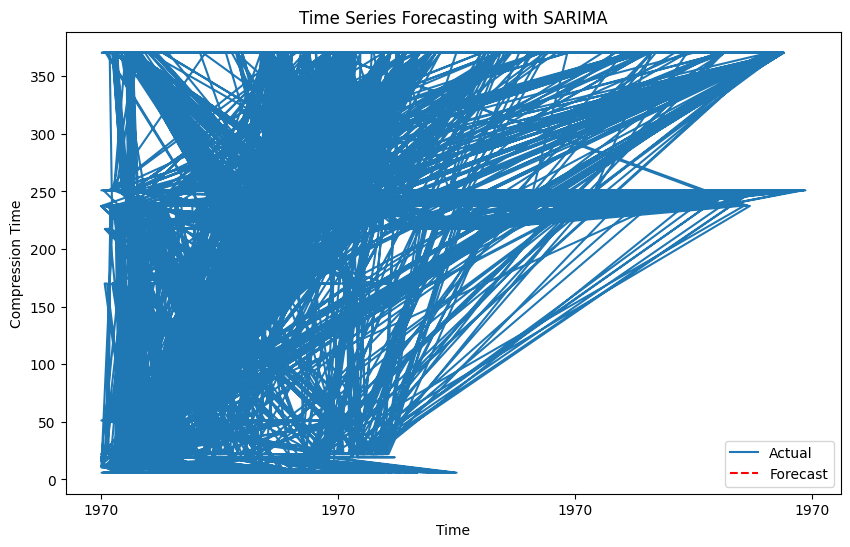

In [6]:
# Time analysis :

df = reload_df()    

# Assuming you have already loaded the data into a DataFrame called 'df'
# Preprocess the data if needed (e.g., handle missing values)

# Convert the "Time" column to a datetime object and set it as the DataFrame's index
df["Time"] = pd.to_datetime(df["Time"])
df.set_index("Time", inplace=True)

# Step 1: Time Series Plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Compression_time"], label="Compression Time")
plt.xlabel("Time")
plt.ylabel("Compression Time")
plt.title("Time Series Plot of Compression Time")
plt.legend()
plt.show()

# Step 2: SARIMA Modeling
# Define the order and seasonal_order parameters for SARIMA model
# The order parameter (p, d, q) corresponds to the non-seasonal part of the SARIMA model.
# The seasonal_order parameter (P, D, Q, S) corresponds to the seasonal part of the SARIMA model.
# S is the seasonal period (e.g., 12 for monthly data, 4 for quarterly data, etc.)
order = (1, 0, 1)
seasonal_order = (1, 1, 1, 12)  # Assuming seasonality with a period of 12 (e.g., monthly data)

# Fit the SARIMA model
sarima_model = SARIMAX(df["Compression_time"], order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

# Make predictions on the training data
predictions = sarima_model_fit.predict(start=0, end=len(df)-1)

# Calculate MSE
mse = mean_squared_error(df["Compression_time"], predictions)
print(f"Mean Squared Error: {mse}")

# Step 3: Time Series Forecasting
forecast_steps = 10  # Example: Forecasting the next 10 time steps
forecast = sarima_model_fit.forecast(steps=forecast_steps)

# Create a time index for the forecasted values
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, closed='right')

# Combine original data with forecasted values for visualization
combined_df = pd.concat([df, pd.DataFrame(forecast, index=forecast_index, columns=["Compression_time"])])
plt.figure(figsize=(10, 6))
plt.plot(combined_df.index, combined_df["Compression_time"], label="Actual")
plt.plot(combined_df.index[-forecast_steps:], combined_df["Compression_time"].iloc[-forecast_steps:], label="Forecast", color='red', linestyle='--')
plt.xlabel("Time")
plt.ylabel("Compression Time")
plt.title("Time Series Forecasting with SARIMA")
plt.legend()
plt.show()




Epoch 1/10
234/234 [==============================] - 3s 12ms/step - loss: 0.1534 - val_loss: 0.0174
Epoch 2/10
234/234 [==============================] - 0s 1ms/step - loss: 0.0051 - val_loss: 5.7674e-04
Epoch 3/10
234/234 [==============================] - 0s 1ms/step - loss: 2.8211e-04 - val_loss: 1.3967e-04
Epoch 4/10
234/234 [==============================] - 0s 1ms/step - loss: 1.5129e-04 - val_loss: 1.2752e-04
Epoch 5/10
234/234 [==============================] - 0s 904us/step - loss: 1.4005e-04 - val_loss: 1.2435e-04
Epoch 6/10
234/234 [==============================] - 0s 803us/step - loss: 1.3469e-04 - val_loss: 1.2178e-04
Epoch 7/10
234/234 [==============================] - 0s 854us/step - loss: 1.2943e-04 - val_loss: 1.1982e-04
Epoch 8/10
234/234 [==============================] - 0s 811us/step - loss: 1.2420e-04 - val_loss: 1.1432e-04
Epoch 9/10
234/234 [==============================] - 0s 815us/step - loss: 1.2342e-04 - val_loss: 1.2618e-04
Epoch 10/10
65/65 [==========

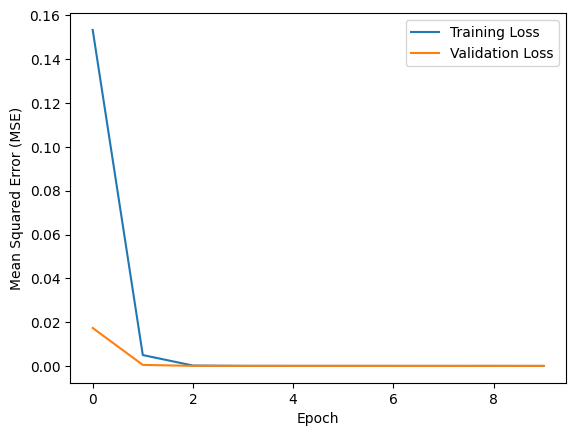

65/65 [==============================] - 0s 563us/step


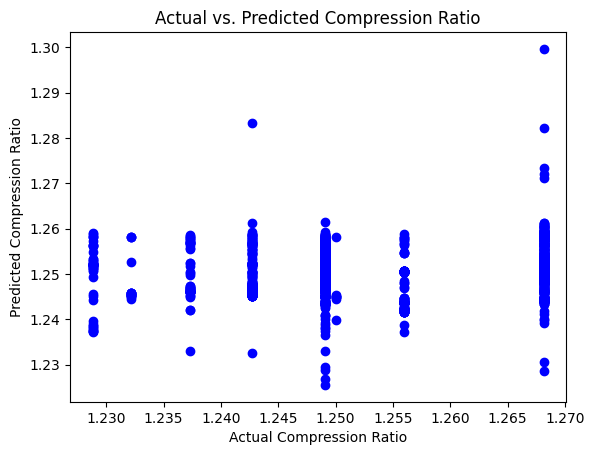

In [7]:

# Extract the features "Res_Freq" and "Amplitude"
X = df[["Res_Freq", "Amplitude"]].values

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Assuming you have a target variable for the neural network (e.g., "Compression_time" or any other target variable you want to predict)
y = df["Compression_ratio"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(2,)),  # 2 input nodes for "Res_Freq" and "Amplitude"
    tf.keras.layers.Dense(16, activation='relu'),  # Hidden layer with 16 nodes
    tf.keras.layers.Dense(1)  # Output node for the target variable
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the actual vs. predicted values with different colors for actual and predicted values
plt.scatter(y_test, y_pred, c=['blue'])
plt.xlabel('Actual Compression Ratio')
plt.ylabel('Predicted Compression Ratio')
plt.title('Actual vs. Predicted Compression Ratio')
plt.show()

Mean Squared Error: 4.930380657631324e-32
R-squared: 1.0


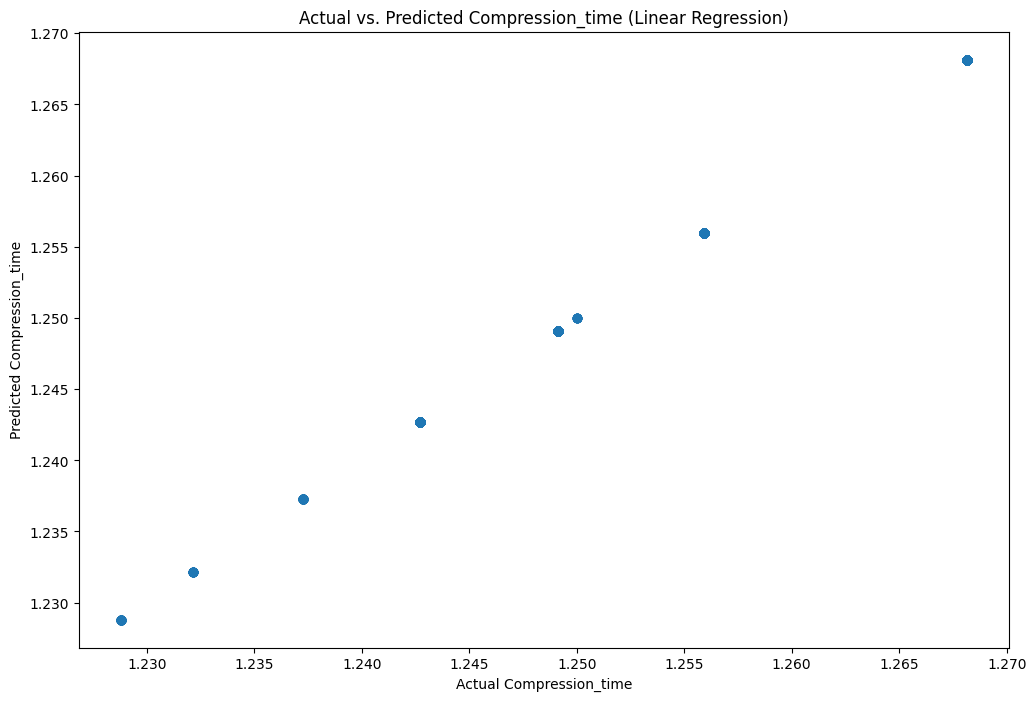

In [8]:

# Extract the features "Res_Freq", "Amplitude", and "compression_ratio"
df = reload_df()
X = df[["Res_Freq", "Amplitude", "Compression_ratio"]]

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Standardize the features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#import linear regression
from sklearn.linear_model import LinearRegression

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

# Plot the data of the linear regression model
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Compression_time")
plt.ylabel("Predicted Compression_time")
plt.title("Actual vs. Predicted Compression_time (Linear Regression)")
plt.show()

Epoch 1/10


c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


234/234 [==============================] - 0s 1ms/step - loss: 55633.4805 - val_loss: 53556.9805
Epoch 2/10
234/234 [==============================] - 0s 721us/step - loss: 55506.9141 - val_loss: 53431.6172
Epoch 3/10
234/234 [==============================] - 0s 798us/step - loss: 55380.8555 - val_loss: 53307.1992
Epoch 4/10
234/234 [==============================] - 0s 738us/step - loss: 55255.3633 - val_loss: 53182.9414
Epoch 5/10
234/234 [==============================] - 0s 730us/step - loss: 55131.1914 - val_loss: 53059.7188
Epoch 6/10
234/234 [==============================] - 0s 798us/step - loss: 55007.2734 - val_loss: 52936.6094
Epoch 7/10
234/234 [==============================] - 0s 828us/step - loss: 54882.7891 - val_loss: 52814.2852
Epoch 8/10
234/234 [==============================] - 0s 824us/step - loss: 54759.3672 - val_loss: 52691.6094
Epoch 9/10
234/234 [==============================] - 0s 751us/step - loss: 54636.8398 - val_loss: 52570.1992
Epoch 10/10
65/65 [====

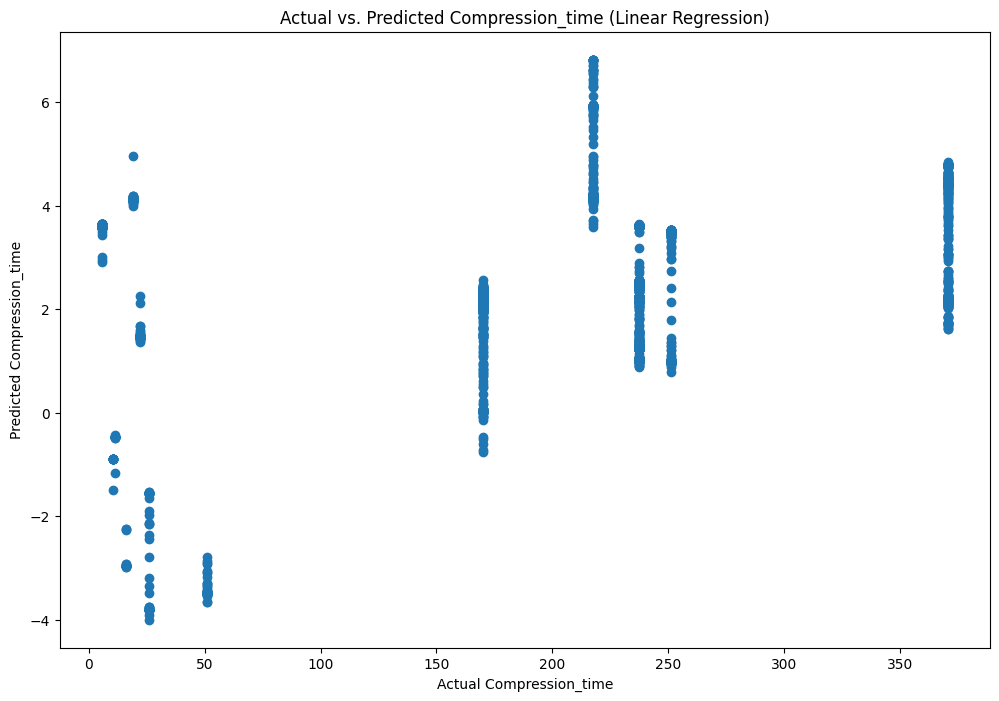

In [9]:
# model to predict the frequency curve with the compression ratio and the before and after compression but seperate it for sample

# Extract the features "Res_Freq", "Amplitude", and "compression_ratio" and sample number
df = reload_df()
X = df[["Res_Freq", "Amplitude", "Compression_ratio", "Sample_number"]]
y = df["Compression_time"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize the features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),  # 4 input features (Res_Freq, Amplitude, Compression_ratio, Sample_number)
    tf.keras.layers.Dense(1)  # Output layer with one neuron for the prediction (Compression_time)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

# Plot the data of the linear regression model
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Compression_time")
plt.ylabel("Predicted Compression_time")
plt.title("Actual vs. Predicted Compression_time (Linear Regression)")

plt.show()


Epoch 1/10


c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


234/234 [==============================] - 1s 1ms/step - loss: 55534.3477 - val_loss: 53499.0625
Epoch 2/10
234/234 [==============================] - 0s 712us/step - loss: 55435.5156 - val_loss: 53403.6953
Epoch 3/10
234/234 [==============================] - 0s 777us/step - loss: 55336.3242 - val_loss: 53308.1367
Epoch 4/10
234/234 [==============================] - 0s 725us/step - loss: 55237.2930 - val_loss: 53213.4570
Epoch 5/10
234/234 [==============================] - 0s 824us/step - loss: 55138.5664 - val_loss: 53118.8867
Epoch 6/10
234/234 [==============================] - 0s 755us/step - loss: 55039.8945 - val_loss: 53024.5742
Epoch 7/10
234/234 [==============================] - 0s 794us/step - loss: 54941.3359 - val_loss: 52930.3359
Epoch 8/10
234/234 [==============================] - 0s 773us/step - loss: 54842.7969 - val_loss: 52835.6875
Epoch 9/10
234/234 [==============================] - 0s 815us/step - loss: 54744.5352 - val_loss: 52741.6328
Epoch 10/10
65/65 [====

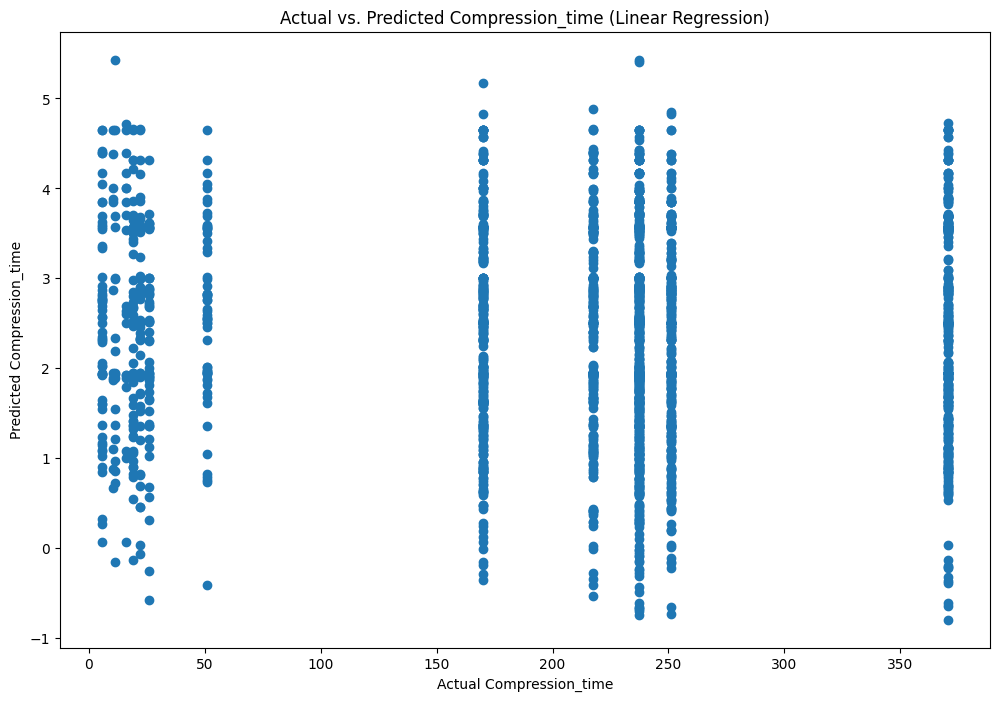

In [10]:
# take all the data, and try to find something

# Extract every features
df = reload_df()
X = df[["Res_Freq", "Amplitude", "Phase", "Sample_number", "Peak", "Before_compression", "After_compression", "Compression_ratio", "Compression_time"]]

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Standardize the features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(9,)),  # 9 input features (Res_Freq, Amplitude, Phase, Sample_number, Peak, Before_compression, After_compression, Compression_ratio, Compression_time)
    tf.keras.layers.Dense(1)  # Output layer with one neuron for the prediction (Compression_time)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

# Plot the data of the linear regression model
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Compression_time")
plt.ylabel("Predicted Compression_time")
plt.title("Actual vs. Predicted Compression_time (Linear Regression)")
plt.show()




Cluster Centers (scaled values):
[[-1.08909118  1.08108606 -0.10606207]
 [ 0.07728616 -1.18689086 -0.58425329]
 [ 1.02589492  0.32259803 -0.39114455]
 [ 0.03590618 -0.95143187  1.46637782]]


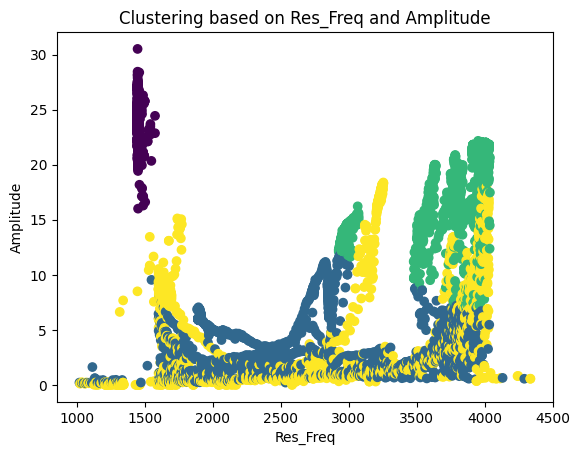

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have the reload_df() function to load the data into df
df = reload_df()

# Select the features for clustering
selected_features = ["Res_Freq", "Amplitude", "Compression_ratio"]
data_for_clustering = df[selected_features]

# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Choose the number of clusters (k) - you can experiment with different values
k = 4

# Create the KMeans instance and fit the scaled data
kmeans = KMeans(n_clusters=k)
kmeans.fit(scaled_data)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Add the cluster labels back to the DataFrame
df['Cluster'] = labels

# Print cluster centers (scaled values) - you can inverse_transform to get the original scale
print("Cluster Centers (scaled values):")
print(cluster_centers)

# Plot the clusters on a scatter plot (choose two features for visualization)
feature1, feature2 = selected_features[:2]  # You can choose any two features to visualize
plt.scatter(df[feature1], df[feature2], c=labels, cmap='viridis')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Clustering based on {} and {}".format(feature1, feature2))
plt.show()

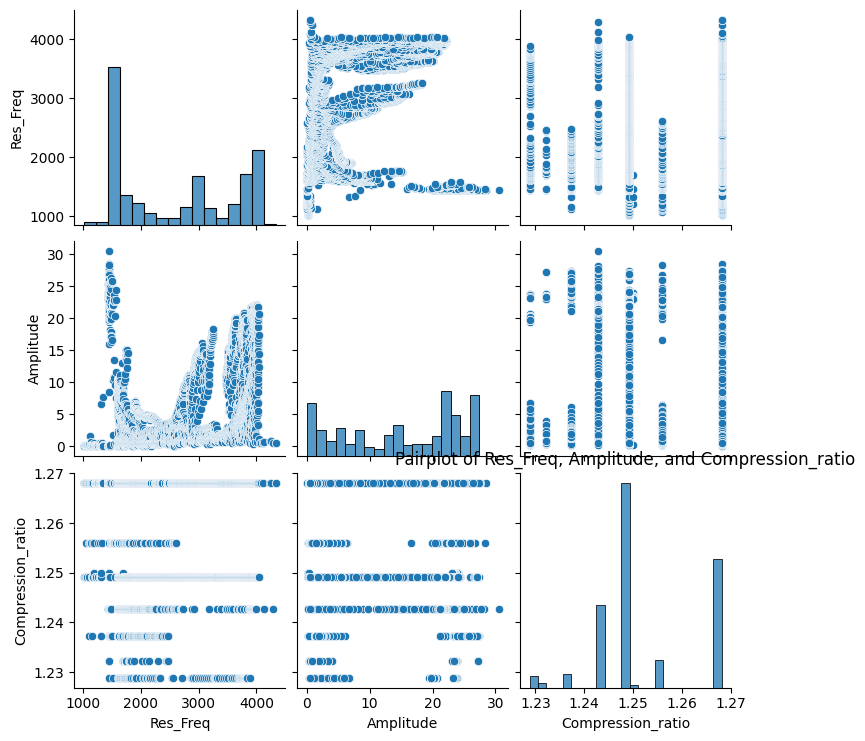

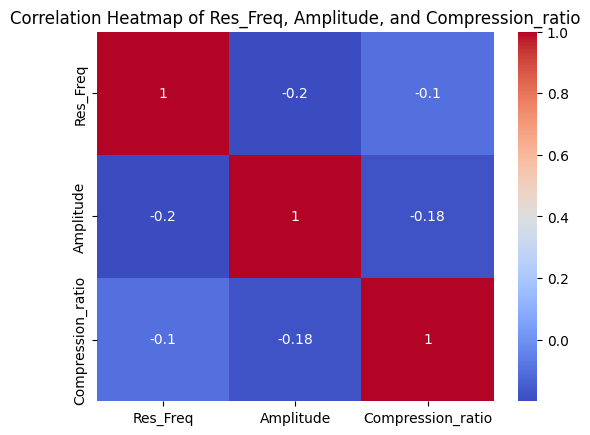

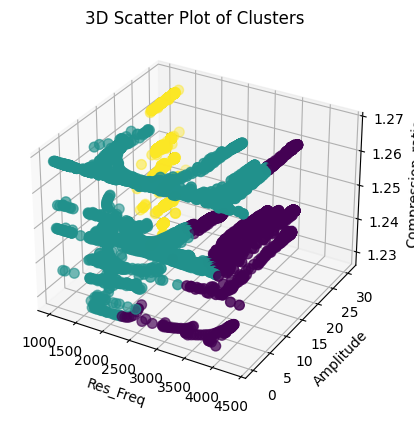

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the data loaded into a DataFrame called df
# And you have selected the relevant features for analysis
selected_features = ["Res_Freq", "Amplitude", "Compression_ratio"]
data_for_analysis = df[selected_features]

# Pairplot to visualize relationships between the selected features
sns.pairplot(data_for_analysis)
plt.title("Pairplot of Res_Freq, Amplitude, and Compression_ratio")
plt.show()

# Heatmap to visualize correlations between the selected features
correlation_matrix = data_for_analysis.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Res_Freq, Amplitude, and Compression_ratio")
plt.show()

# K-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_analysis)

# Choose the number of clusters (k) - you can experiment with different values
k = 3

# Create the KMeans instance and fit the scaled data
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Add the cluster labels back to the DataFrame
df['Cluster'] = labels

# Plot the clusters on a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Res_Freq"], df["Amplitude"], df["Compression_ratio"], c=labels, cmap='viridis', s=50)
ax.set_xlabel("Res_Freq")
ax.set_ylabel("Amplitude")
ax.set_zlabel("Compression_ratio")
ax.set_title("3D Scatter Plot of Clusters")
plt.show()

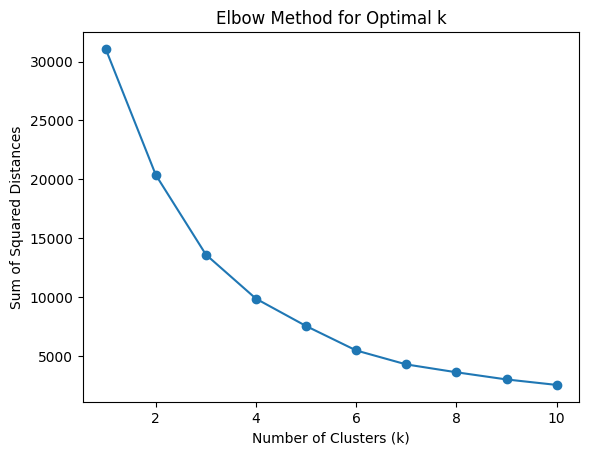

In [13]:
# Elbow method to find the optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

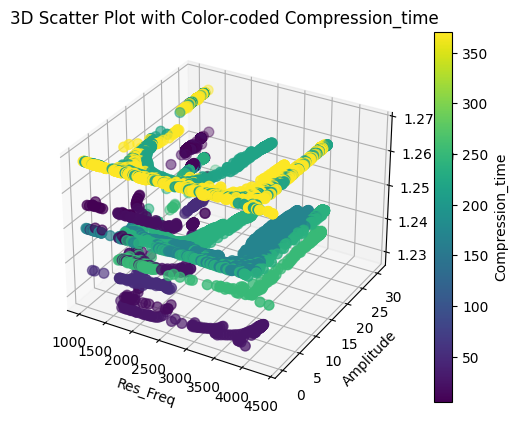

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have the data loaded into a DataFrame called df
selected_features = ["Res_Freq", "Amplitude", "Compression_ratio"]
data_for_analysis = df[selected_features]
compression_time = df["Compression_time"]

# Plot a 3D scatter plot with color-coded data points based on "Compression_time"
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_for_analysis["Res_Freq"], data_for_analysis["Amplitude"], data_for_analysis["Compression_ratio"], c=compression_time, cmap='viridis', s=50)
ax.set_xlabel("Res_Freq")
ax.set_ylabel("Amplitude")
ax.set_zlabel("Compression_ratio")
ax.set_title("3D Scatter Plot with Color-coded Compression_time")
plt.colorbar(scatter, label="Compression_time")
plt.show()

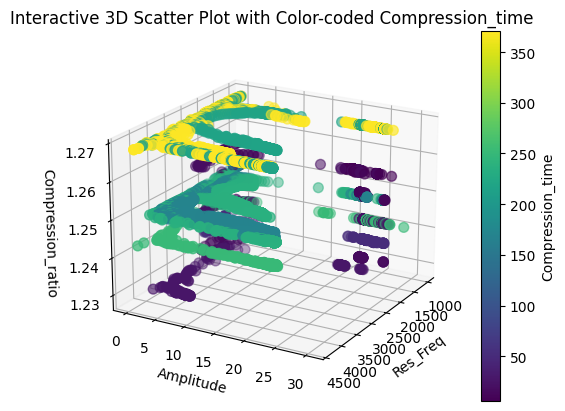

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


selected_features = ["Res_Freq", "Amplitude", "Compression_ratio"]
data_for_analysis = df[selected_features]
compression_time = df["Compression_time"]

# Plot a 3D scatter plot with color-coded data points based on "Compression_time"
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_for_analysis["Res_Freq"], data_for_analysis["Amplitude"], data_for_analysis["Compression_ratio"], c=compression_time, cmap='viridis', s=50)
ax.set_xlabel("Res_Freq")
ax.set_ylabel("Amplitude")
ax.set_zlabel("Compression_ratio")
ax.set_title("Interactive 3D Scatter Plot with Color-coded Compression_time")
plt.colorbar(scatter, label="Compression_time")

# Enable 3D rotation
ax.view_init(elev=20, azim=30)

plt.show()

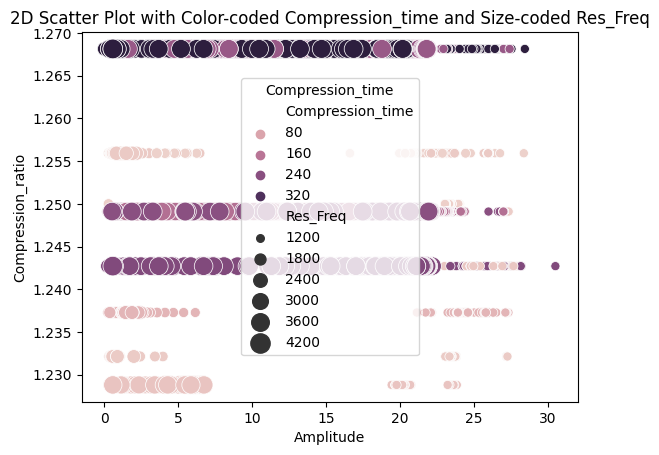

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the data loaded into a DataFrame called df
selected_features = ["Amplitude", "Compression_ratio", "Compression_time"]
data_for_analysis = df[selected_features]
res_freq = df["Res_Freq"]

# Create a 2D scatter plot with color-coded markers based on "Res_Freq"
sns.scatterplot(x="Amplitude", y="Compression_ratio", hue="Compression_time", size=res_freq, sizes=(20, 200), data=df)
plt.xlabel("Amplitude")
plt.ylabel("Compression_ratio")
plt.title("2D Scatter Plot with Color-coded Compression_time and Size-coded Res_Freq")
plt.legend(title="Compression_time")
plt.show()

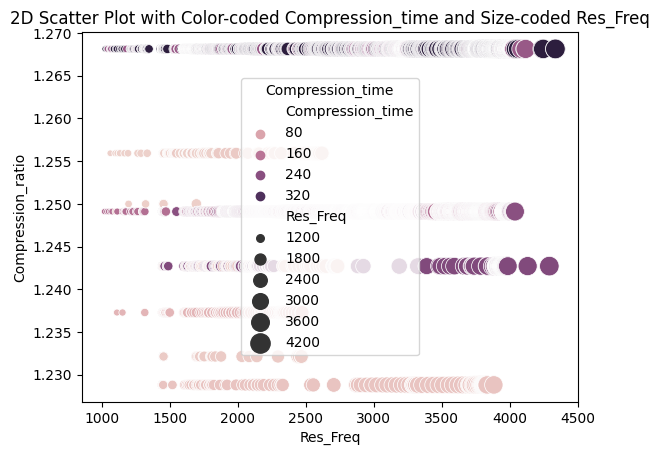

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Assuming you have the data loaded into a DataFrame called df
selected_features = ["Amplitude", "Compression_ratio", "Compression_time", "Res_Freq"]

# Randomly select two features for visualization
x_feature, y_feature = random.sample(selected_features, 2)

# Create a 2D scatter plot with color-coded markers
sns.scatterplot(x=x_feature, y=y_feature, hue="Compression_time", size="Res_Freq", sizes=(20, 200), data=df)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title(f"2D Scatter Plot with Color-coded Compression_time and Size-coded Res_Freq")
plt.legend(title="Compression_time")
plt.show()

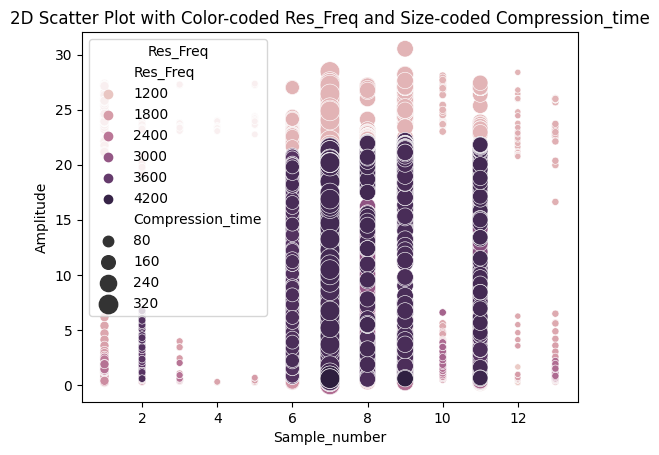

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Assuming you have the data loaded into a DataFrame called df
selected_features = ["Amplitude", "Compression_ratio", "Res_Freq", "Sample_number"]

# Randomly select two features for visualization
x_feature, y_feature = random.sample(selected_features, 2)

# Create a 2D scatter plot with color-coded markers
sns.scatterplot(x=x_feature, y=y_feature, hue="Res_Freq", size="Compression_time", sizes=(20, 200), data=df)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title(f"2D Scatter Plot with Color-coded Res_Freq and Size-coded Compression_time")
plt.legend(title="Res_Freq")
plt.show()


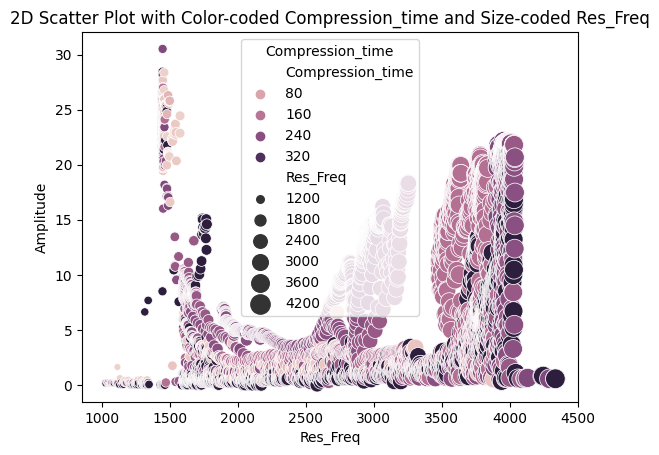

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Assuming you have the data loaded into a DataFrame called df
selected_features = ["Res_Freq", "Amplitude", "Compression_ratio", "Peak"]

# Randomly select two features for visualization
x_feature, y_feature = random.sample(selected_features, 2)

# Create a 2D scatter plot with color-coded markers
sns.scatterplot(x=x_feature, y=y_feature, hue="Compression_time", size="Res_Freq", sizes=(20, 200), data=df)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title(f"2D Scatter Plot with Color-coded Compression_time and Size-coded Res_Freq")
plt.legend(title="Compression_time")
plt.show()


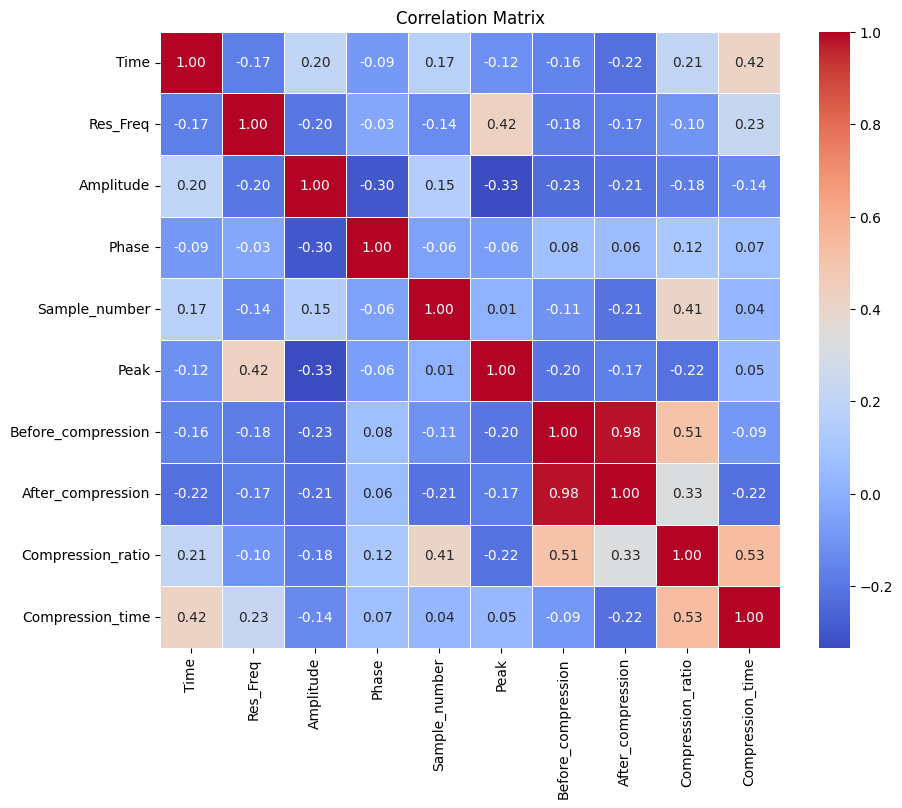

In [25]:
import pandas as pd

# Assuming you have the data loaded into a DataFrame called df
selected_parameters = ["Time", "Res_Freq", "Amplitude", "Phase", "Sample_number", "Peak", "Before_compression", "After_compression", "Compression_ratio", "Compression_time"]
data_for_correlation = df[selected_parameters]

# Calculate the correlation matrix
correlation_matrix = data_for_correlation.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


C:\Users\maxim\AppData\Local\Temp\ipykernel_18312\1375717895.py:16: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  mean_correlation_matrix = correlation_matrices.mean(level=1)


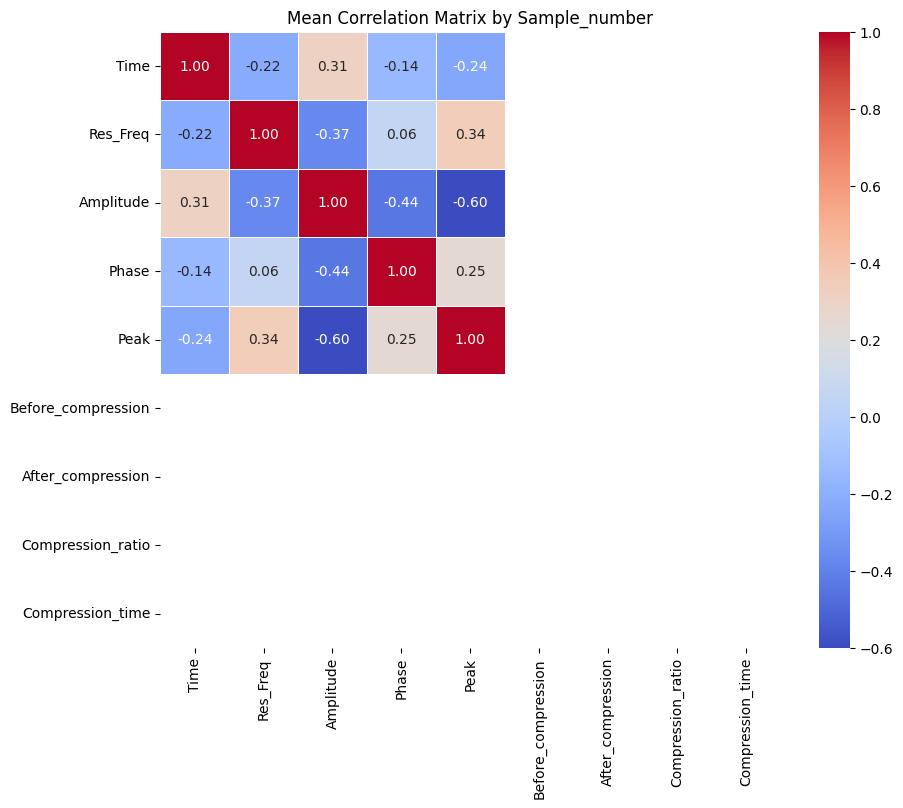

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the data loaded into a DataFrame called df
selected_parameters = ["Time", "Res_Freq", "Amplitude", "Phase", "Sample_number", "Peak", "Before_compression", "After_compression", "Compression_ratio", "Compression_time"]
data_for_correlation = df[selected_parameters]

# Group data by "Sample_number"
grouped_data = data_for_correlation.groupby("Sample_number")

# Calculate the correlation matrix for each group
correlation_matrices = grouped_data.corr()

# Calculate the mean correlation matrix across all groups
mean_correlation_matrix = correlation_matrices.mean(level=1)

# Create a heatmap for the mean correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(mean_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Mean Correlation Matrix by Sample_number")
plt.show()


C:\Users\maxim\AppData\Local\Temp\ipykernel_18312\990810332.py:16: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  mean_correlation_matrix = correlation_matrices.mean(level=1)


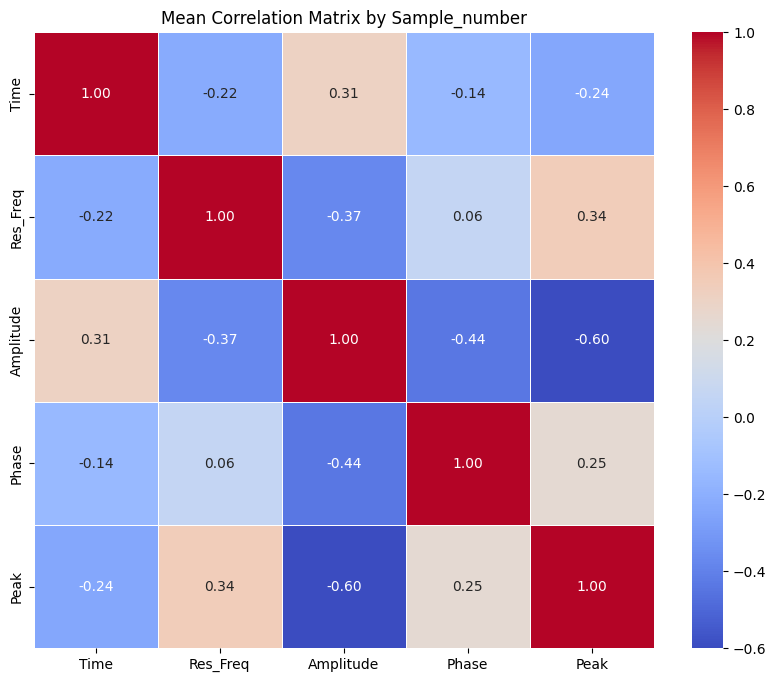

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the data loaded into a DataFrame called df
selected_parameters = ["Time", "Res_Freq", "Amplitude", "Phase", "Sample_number", "Peak"]
data_for_correlation = df[selected_parameters]

# Group data by "Sample_number"
grouped_data = data_for_correlation.groupby("Sample_number")

# Calculate the correlation matrix for each group
correlation_matrices = grouped_data.corr(min_periods=1)

# Calculate the mean correlation matrix across all groups
mean_correlation_matrix = correlation_matrices.mean(level=1)

# Create a heatmap for the mean correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(mean_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Mean Correlation Matrix by Sample_number")
plt.show()


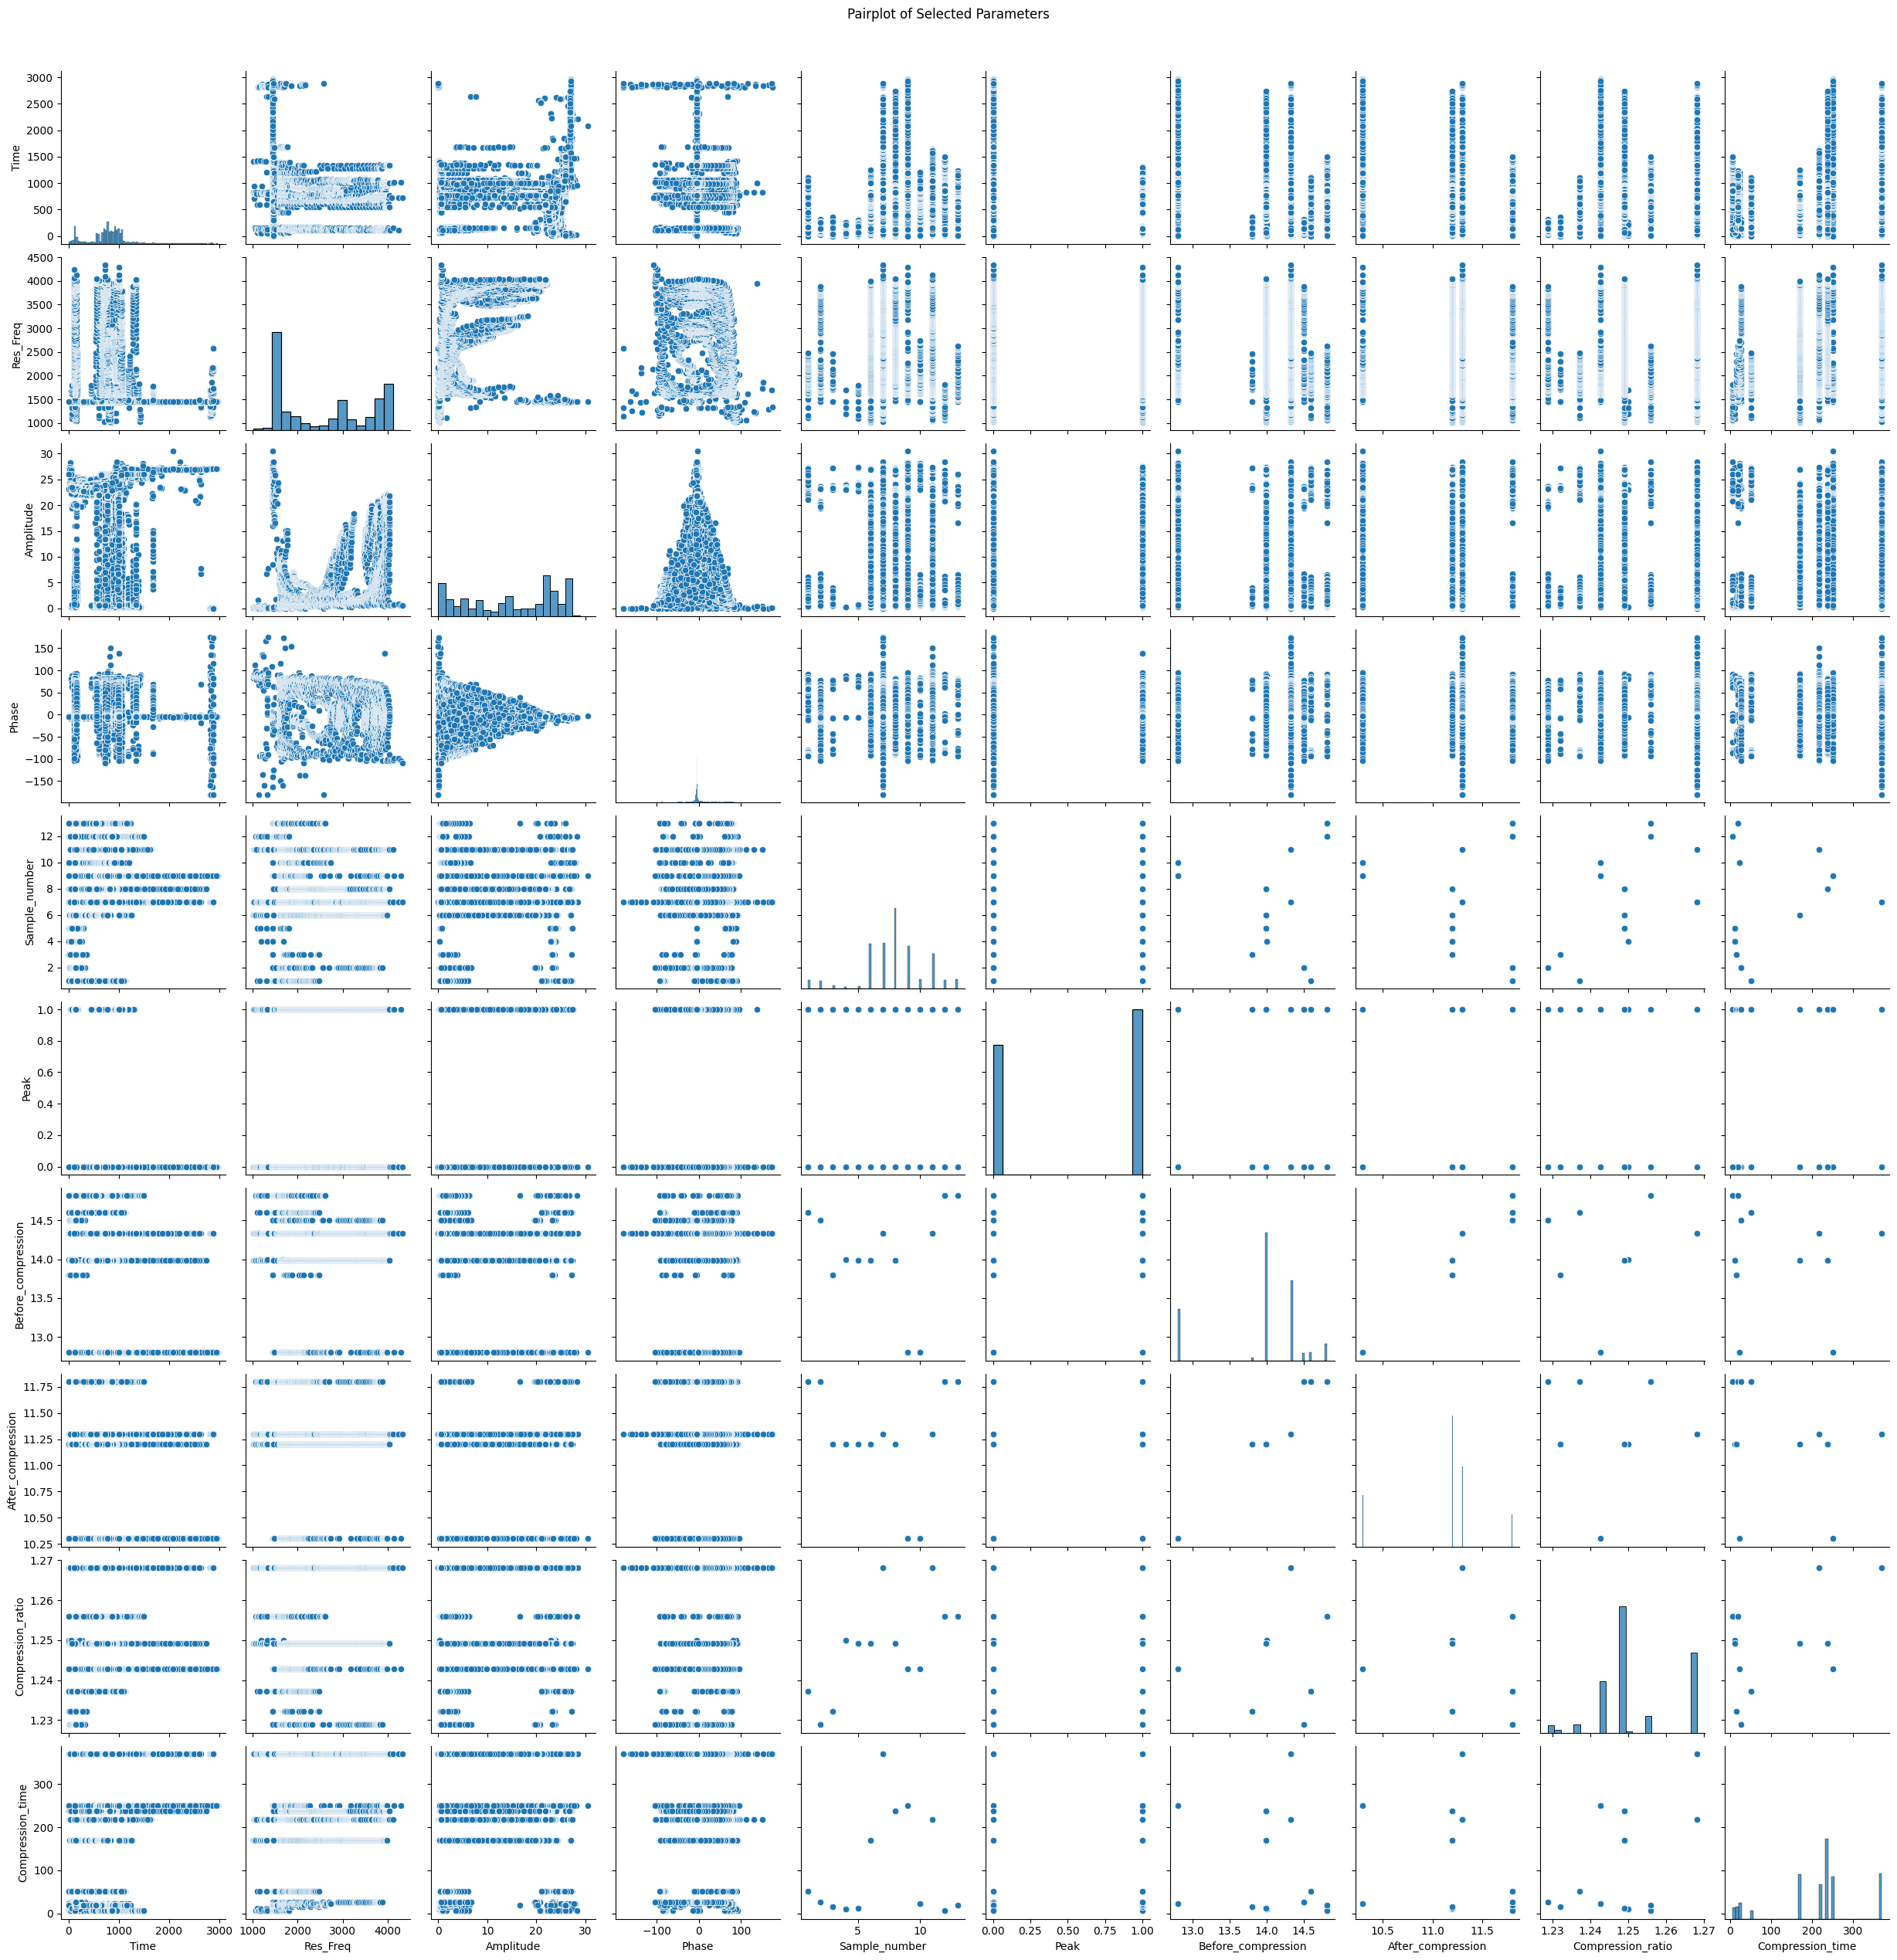

In [32]:
import seaborn as sns

# Assuming you have the data loaded into a DataFrame called df
selected_parameters = ["Time", "Res_Freq", "Amplitude", "Phase", "Sample_number", "Peak", "Before_compression", "After_compression", "Compression_ratio", "Compression_time"]
data_for_visualization = df[selected_parameters]

# Create a pairplot
sns.pairplot(data_for_visualization)
plt.suptitle("Pairplot of Selected Parameters", y=1.02)
plt.show()


In [33]:
# Generate a statistical summary
summary = data_for_visualization.describe()
print("Statistical Summary:")
print(summary)


Statistical Summary:
               Time      Res_Freq     Amplitude         Phase  Sample_number  \
count  10360.000000  10360.000000  10360.000000  10360.000000   10360.000000   
mean     861.711723   2574.295273     15.000814      1.114918       7.926641   
std      525.219254   1032.596665      9.186764     31.671641       2.430306   
min        0.950055   1018.846491      0.000000   -180.000000       1.000000   
25%      605.525635   1452.598081      5.982000     -6.212500       7.000000   
50%      817.900282   2611.177790     16.378000     -4.990000       8.000000   
75%     1004.362947   3761.793957     23.106000      0.280000       9.000000   
max     2971.599966   4336.678654     30.520000    175.030000      13.000000   

               Peak  Before_compression  After_compression  Compression_ratio  \
count  10360.000000        10360.000000       10360.000000       10360.000000   
mean       0.559170           13.950967          11.136795           1.252559   
std        0.49

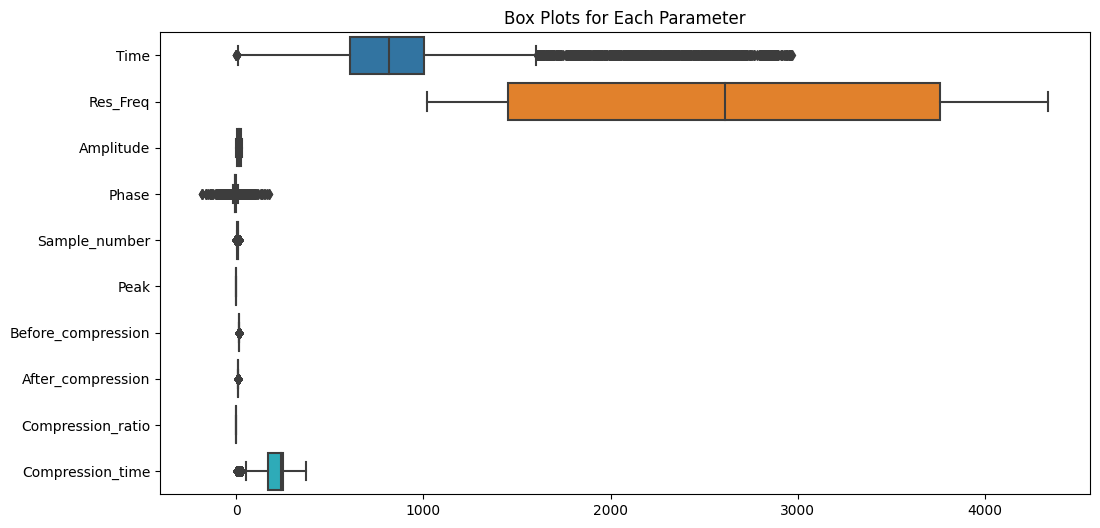

In [34]:
# Create box plots for each parameter
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_for_visualization, orient="h")
plt.title("Box Plots for Each Parameter")
plt.show()


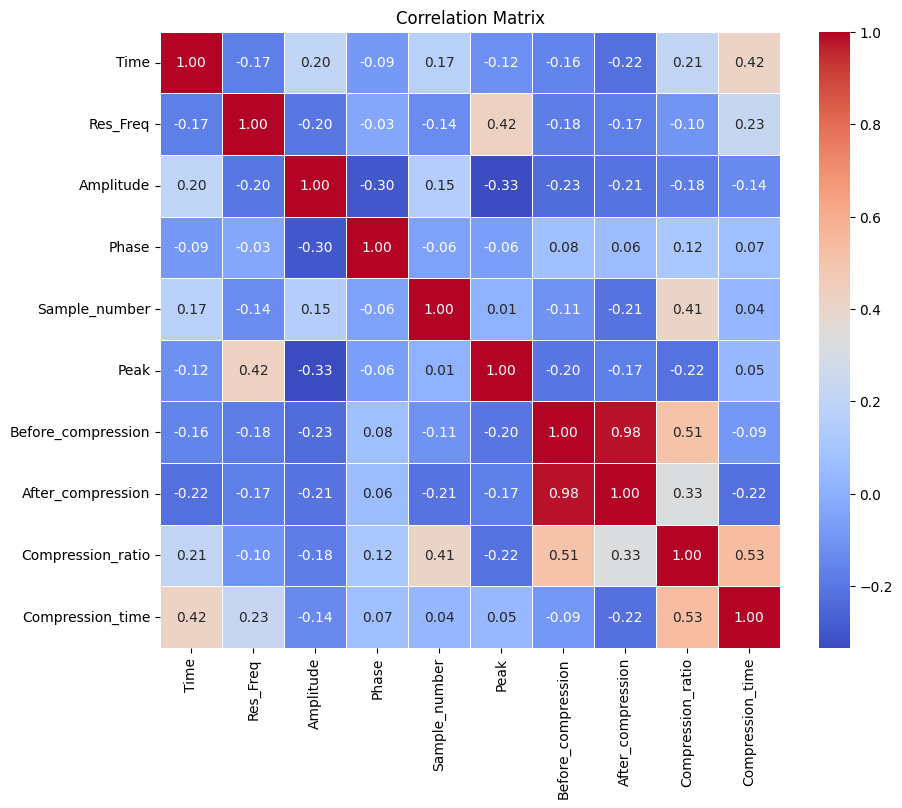

In [35]:
# Calculate the correlation matrix
correlation_matrix = data_for_visualization.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


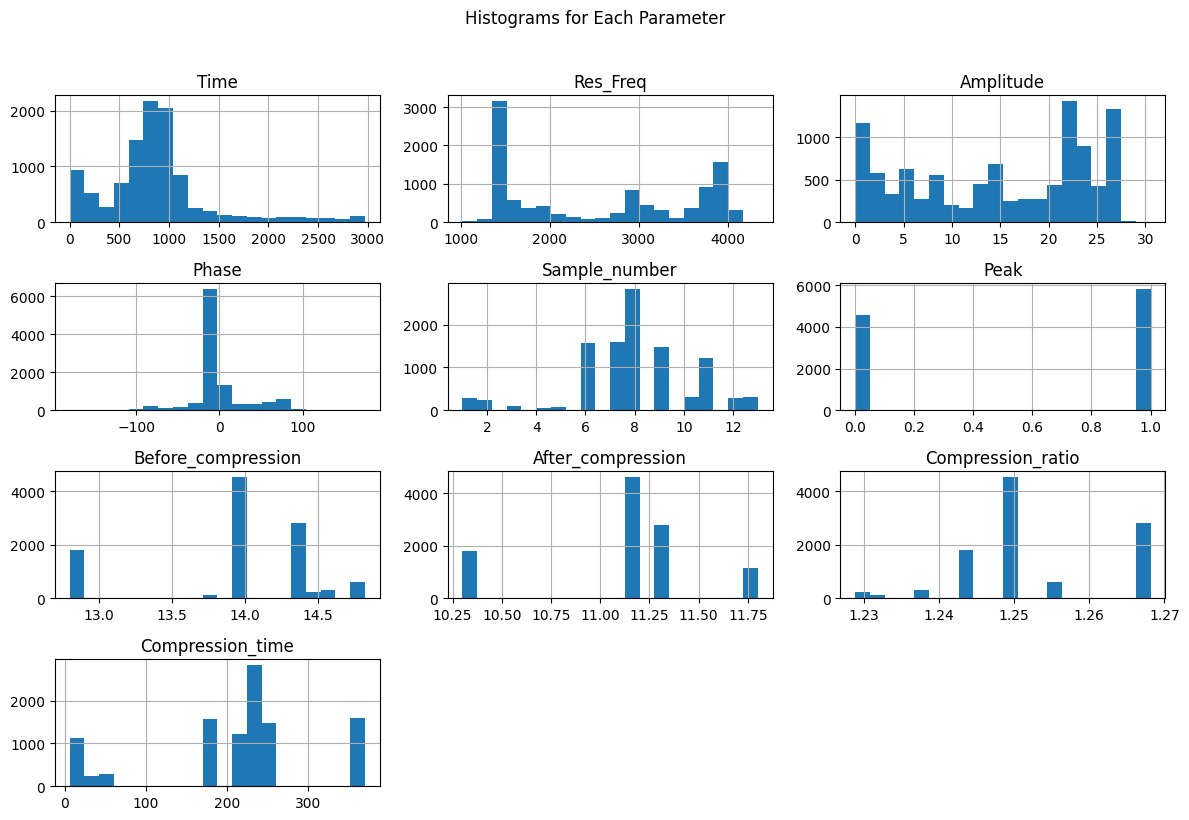

In [36]:
# Create histograms for each parameter
data_for_visualization.hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms for Each Parameter", y=1.02)
plt.tight_layout()
plt.show()


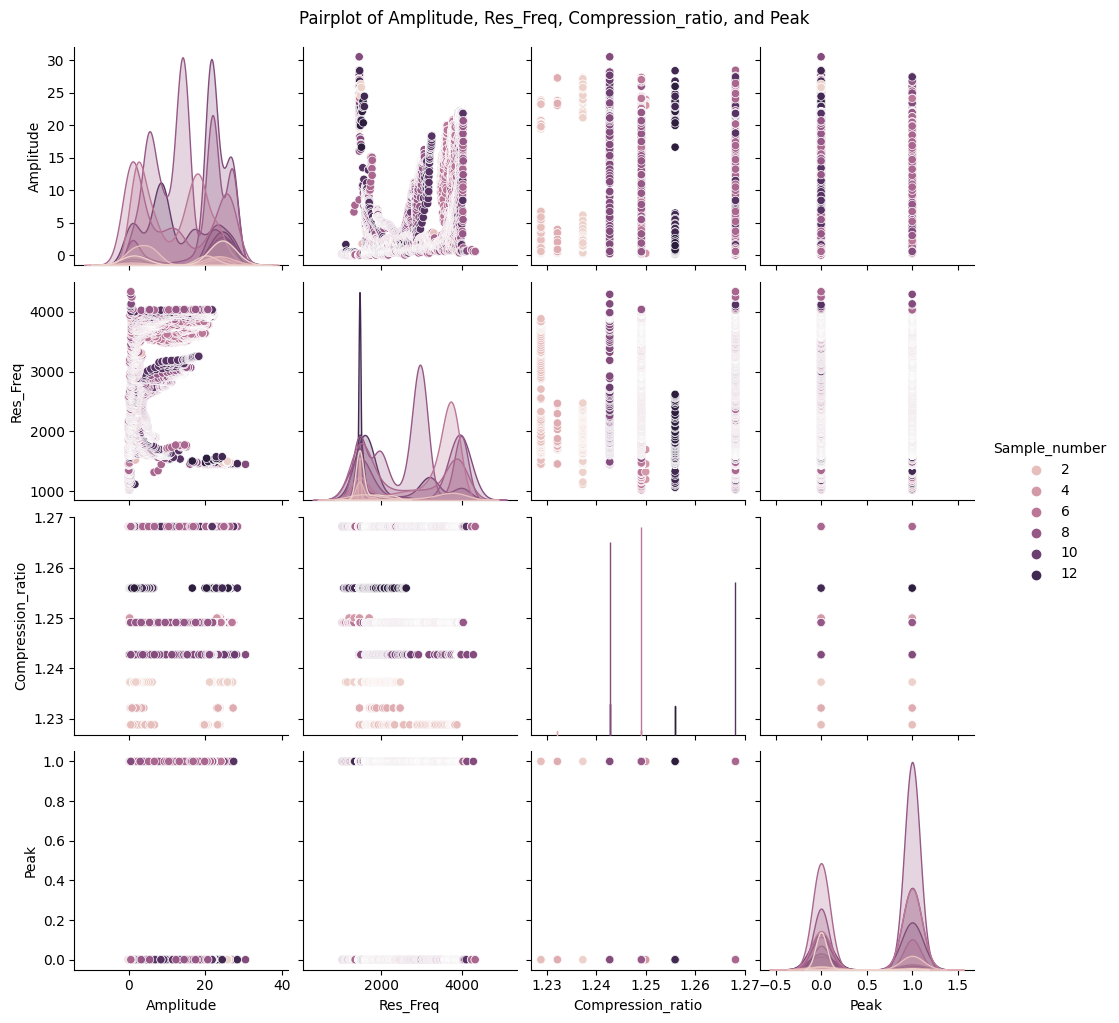

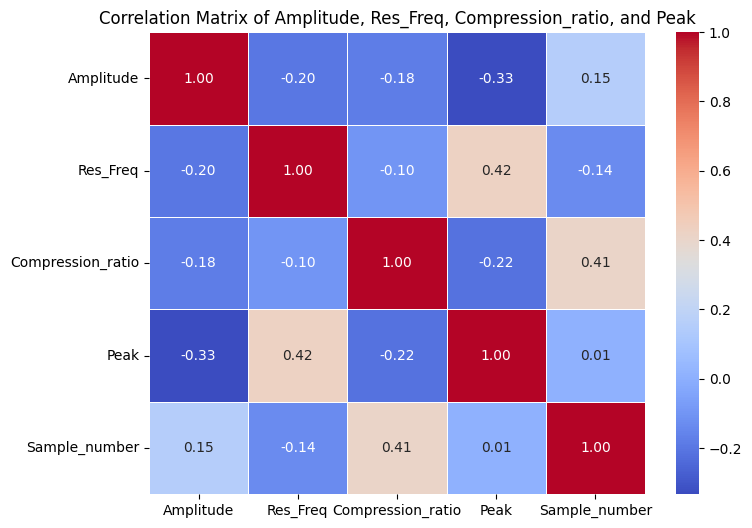

In [37]:
# Assuming you have the data loaded into a DataFrame called df
selected_parameters = ["Amplitude", "Res_Freq", "Compression_ratio", "Peak", "Sample_number"]
data_for_ml = df[selected_parameters].dropna()  # Removing rows with missing values


# Create a pairplot
sns.pairplot(data_for_ml, hue='Sample_number')
plt.suptitle("Pairplot of Amplitude, Res_Freq, Compression_ratio, and Peak", y=1.02)
plt.show()

# Calculate the correlation matrix
correlation_matrix = data_for_ml.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Amplitude, Res_Freq, Compression_ratio, and Peak")
plt.show()


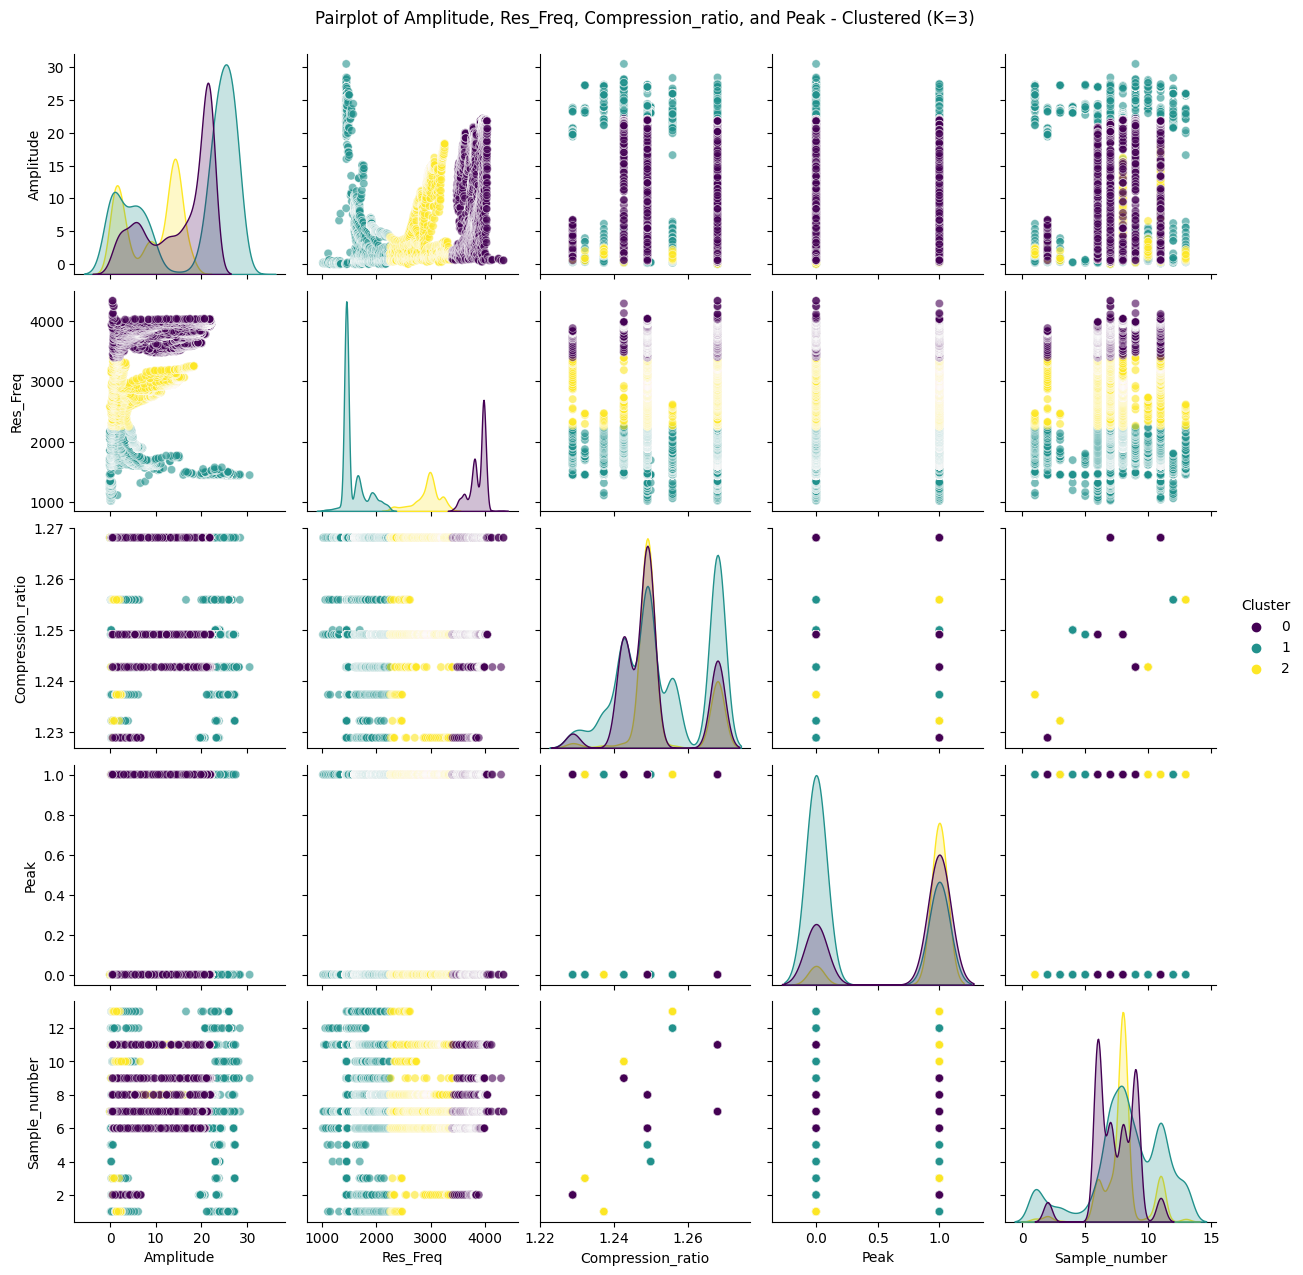

In [38]:
from sklearn.cluster import KMeans

# Extract features for clustering
X = data_for_ml[["Amplitude", "Res_Freq", "Compression_ratio", "Peak"]]

# Choose the number of clusters (you can adjust this based on your requirements)
num_clusters = 3

# Create and fit the KMeans model
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(X)

# Add cluster labels to the DataFrame
data_for_ml["Cluster"] = kmeans_model.labels_

# Visualize the clusters using a pairplot colored by clusters
sns.pairplot(data_for_ml, hue='Cluster', palette='viridis', plot_kws={'alpha': 0.6})
plt.suptitle(f"Pairplot of Amplitude, Res_Freq, Compression_ratio, and Peak - Clustered (K={num_clusters})", y=1.02)
plt.show()


C:\Users\maxim\AppData\Local\Temp\ipykernel_18312\1850436088.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_correlation["Amplitude_Res_Freq"] = data_for_correlation["Amplitude"] * data_for_correlation["Res_Freq"]
C:\Users\maxim\AppData\Local\Temp\ipykernel_18312\1850436088.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_correlation["Amplitude_Compression_ratio"] = data_for_correlation["Amplitude"] * data_for_correlation["Compression_ratio"]
C:\Users\maxim\AppData\Local\Temp\ipyke

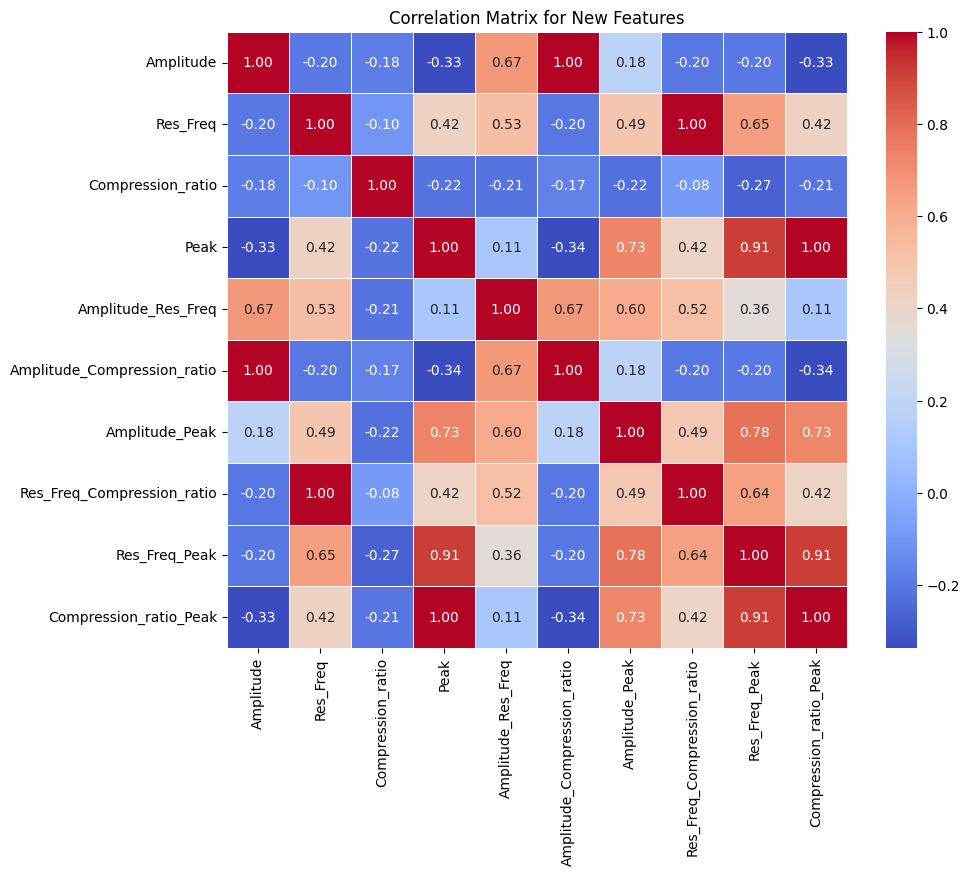

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the data loaded into a DataFrame called df
selected_parameters = ["Amplitude", "Res_Freq", "Compression_ratio", "Peak"]
data_for_correlation = df[selected_parameters]

# Create new features by multiplying pairs of parameters
data_for_correlation["Amplitude_Res_Freq"] = data_for_correlation["Amplitude"] * data_for_correlation["Res_Freq"]
data_for_correlation["Amplitude_Compression_ratio"] = data_for_correlation["Amplitude"] * data_for_correlation["Compression_ratio"]
data_for_correlation["Amplitude_Peak"] = data_for_correlation["Amplitude"] * data_for_correlation["Peak"]
data_for_correlation["Res_Freq_Compression_ratio"] = data_for_correlation["Res_Freq"] * data_for_correlation["Compression_ratio"]
data_for_correlation["Res_Freq_Peak"] = data_for_correlation["Res_Freq"] * data_for_correlation["Peak"]
data_for_correlation["Compression_ratio_Peak"] = data_for_correlation["Compression_ratio"] * data_for_correlation["Peak"]

# Calculate the correlation matrix for the new features
correlation_matrix = data_for_correlation.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for New Features")
plt.show()


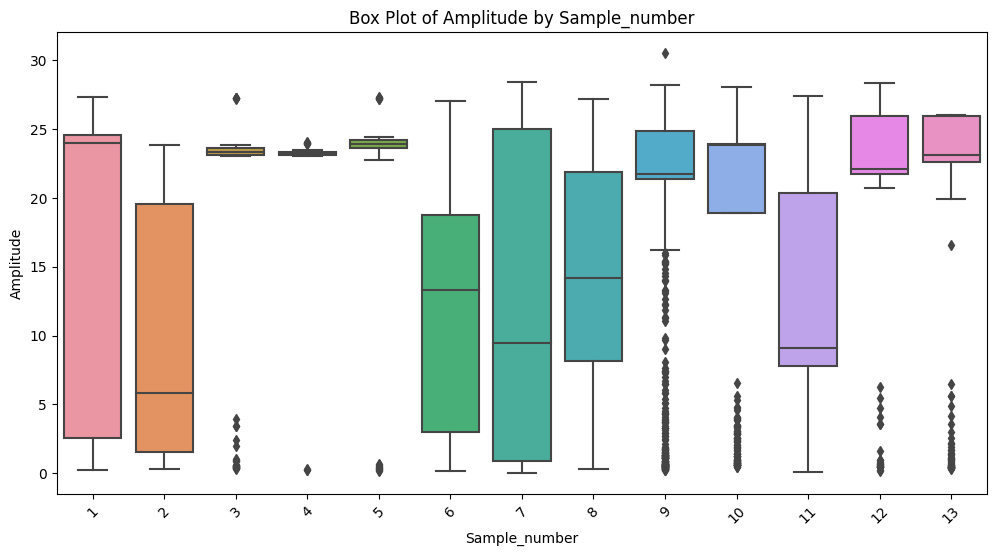

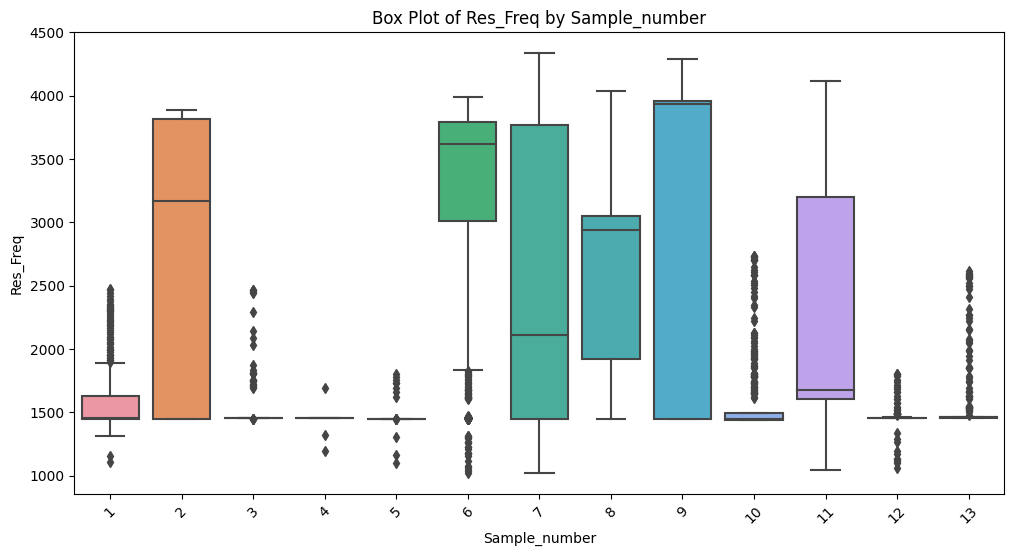

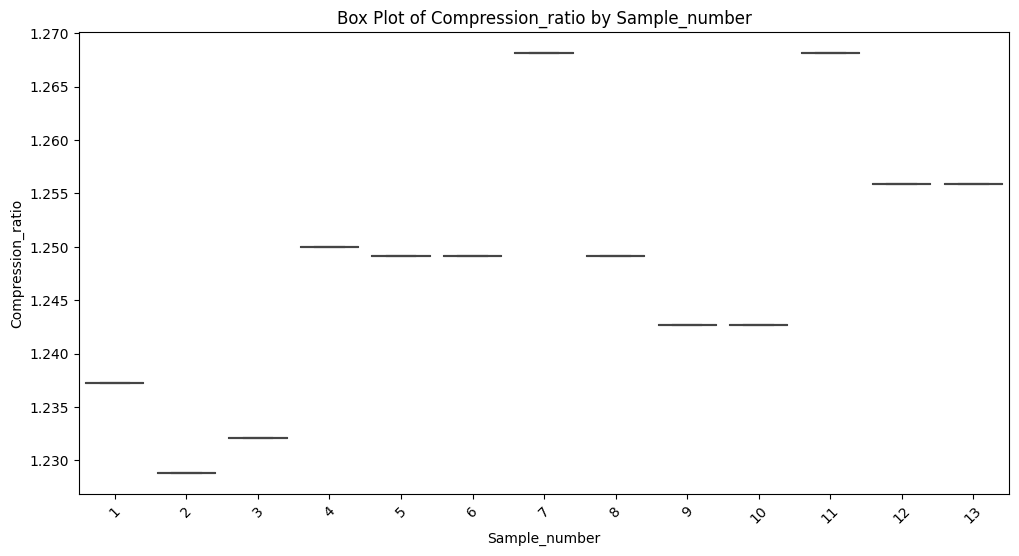

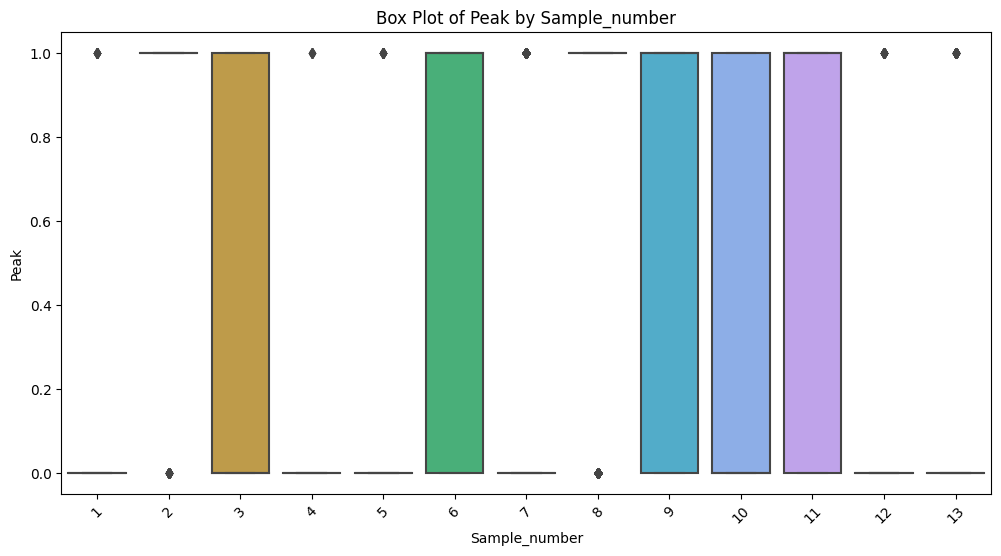

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the data loaded into a DataFrame called df
selected_parameters = ["Amplitude", "Res_Freq", "Compression_ratio", "Peak", "Sample_number"]
data_for_viz = df[selected_parameters].dropna()  # Removing rows with missing values

# Create box plots for each parameter grouped by Sample_number
plt.figure(figsize=(12, 6))
sns.boxplot(x="Sample_number", y="Amplitude", data=data_for_viz)
plt.title("Box Plot of Amplitude by Sample_number")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Sample_number", y="Res_Freq", data=data_for_viz)
plt.title("Box Plot of Res_Freq by Sample_number")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Sample_number", y="Compression_ratio", data=data_for_viz)
plt.title("Box Plot of Compression_ratio by Sample_number")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Sample_number", y="Peak", data=data_for_viz)
plt.title("Box Plot of Peak by Sample_number")
plt.xticks(rotation=45)
plt.show()


c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 64.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

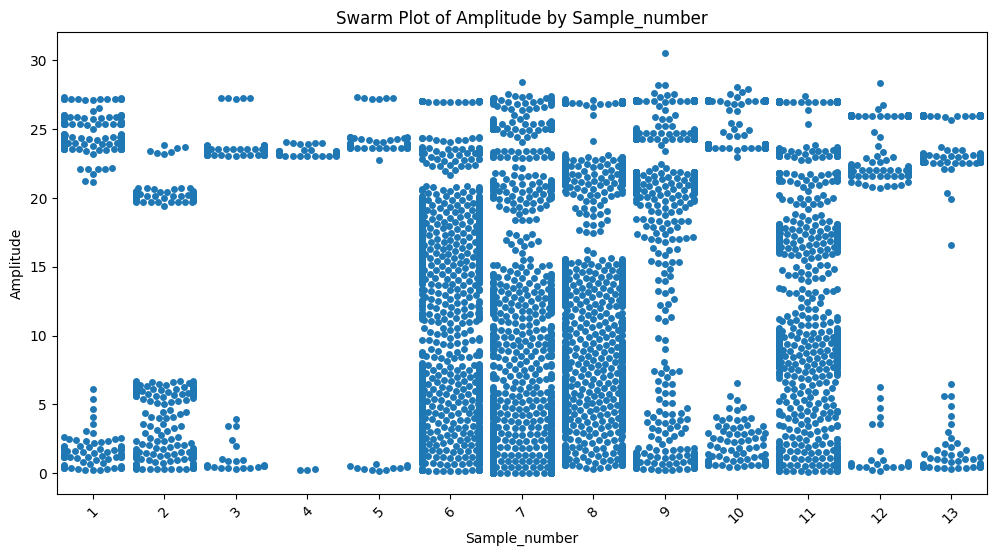

c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 68.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 55.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 71.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 80.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

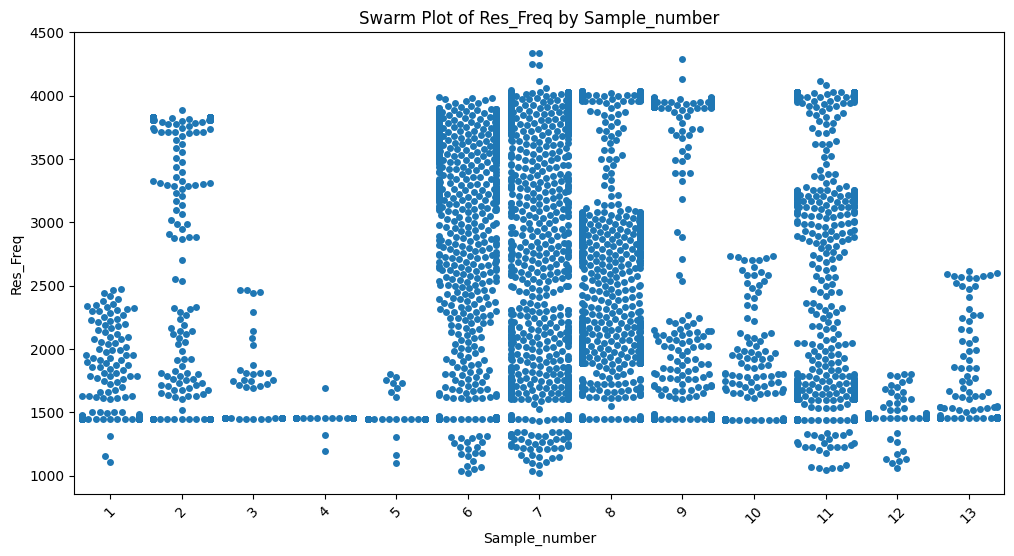

c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 97.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 97.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 93.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 86.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

KeyboardInterrupt: 

In [41]:
# Create swarm plots for each parameter grouped by Sample_number
plt.figure(figsize=(12, 6))
sns.swarmplot(x="Sample_number", y="Amplitude", data=data_for_viz)
plt.title("Swarm Plot of Amplitude by Sample_number")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.swarmplot(x="Sample_number", y="Res_Freq", data=data_for_viz)
plt.title("Swarm Plot of Res_Freq by Sample_number")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.swarmplot(x="Sample_number", y="Compression_ratio", data=data_for_viz)
plt.title("Swarm Plot of Compression_ratio by Sample_number")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.swarmplot(x="Sample_number", y="Peak", data=data_for_viz)
plt.title("Swarm Plot of Peak by Sample_number")
plt.xticks(rotation=45)
plt.show()


In [46]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming you have the data loaded into a DataFrame called df
selected_parameters = ["Amplitude", "Res_Freq", "Compression_ratio", "Peak", "Sample_number"]
data_for_anova = df[selected_parameters].dropna()  # Removing rows with missing values

# Perform ANOVA for each parameter
for param in ["Amplitude", "Res_Freq", "Compression_ratio", "Peak"]:
    formula = f"{param} ~ C(Sample_number) + C(Sample_number)"
    model = ols(formula, data=data_for_anova).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"ANOVA for {param}:")
    print(anova_table)


ANOVA for Amplitude:
                         sum_sq       df           F  PR(>F)
C(Sample_number)  151106.594444     12.0  180.170339     0.0
Residual          723158.215724  10347.0         NaN     NaN
ANOVA for Res_Freq:
                        sum_sq       df           F  PR(>F)
C(Sample_number)  2.589673e+09     12.0  264.076727     0.0
Residual          8.455671e+09  10347.0         NaN     NaN
ANOVA for Compression_ratio:
                        sum_sq       df             F  PR(>F)
C(Sample_number)  1.169890e+00     12.0  2.182679e+27     0.0
Residual          4.621557e-25  10347.0           NaN     NaN
ANOVA for Peak:
                       sum_sq       df           F  PR(>F)
C(Sample_number)   621.427308     12.0  277.299211     0.0
Residual          1932.301553  10347.0         NaN     NaN


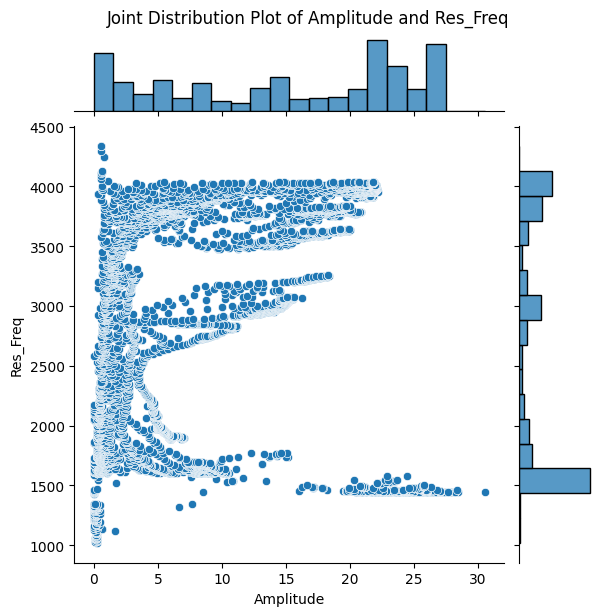

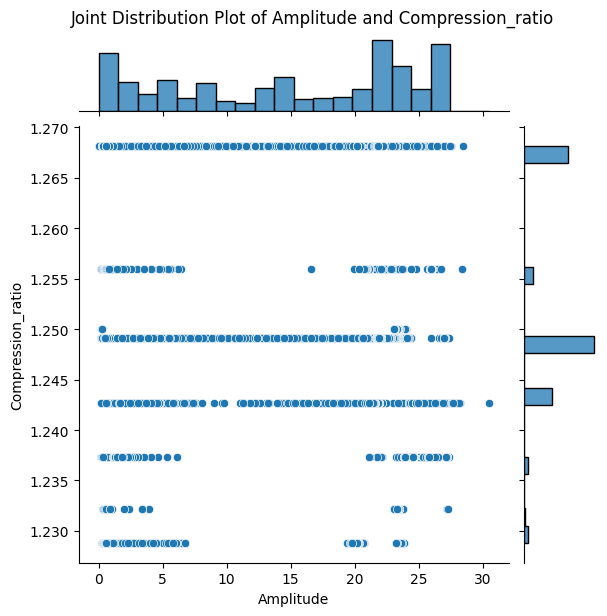

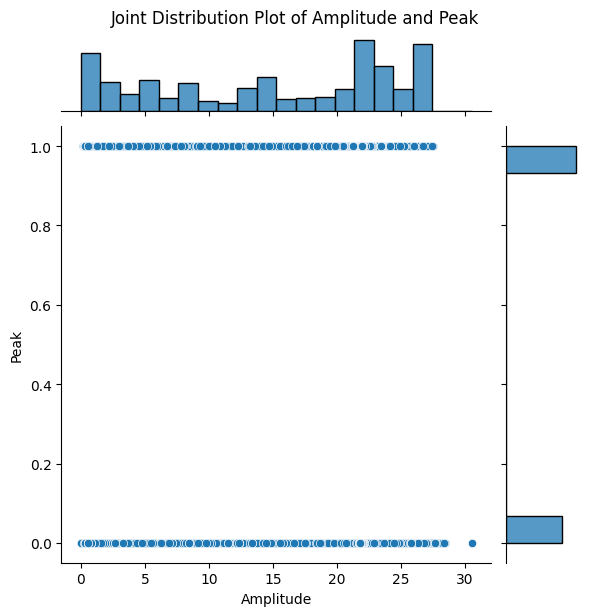

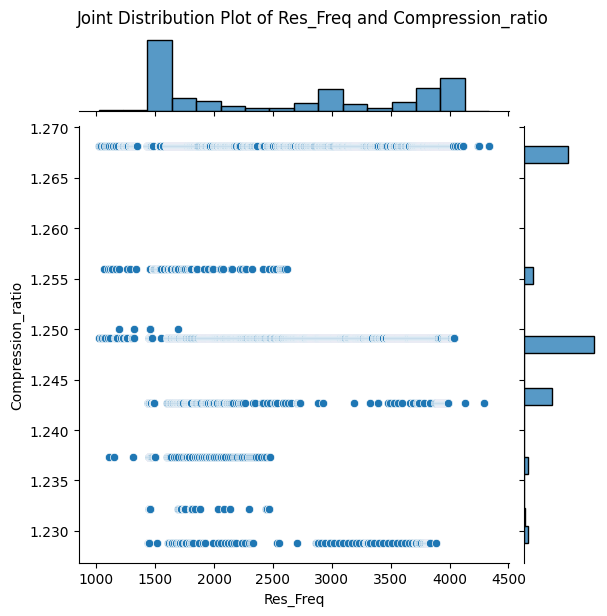

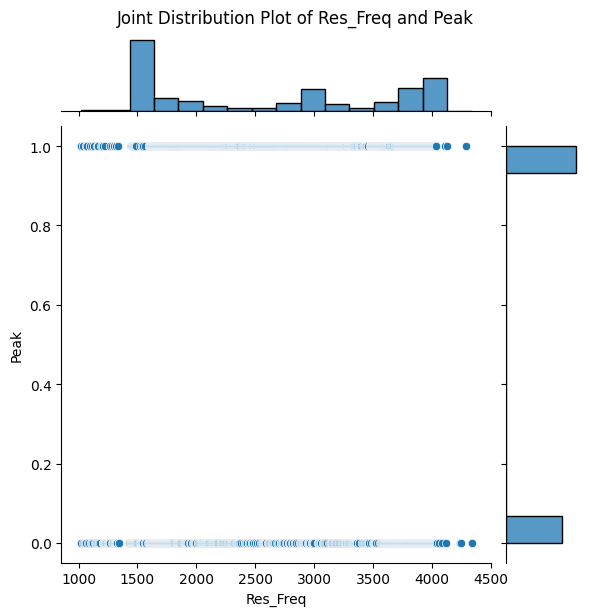

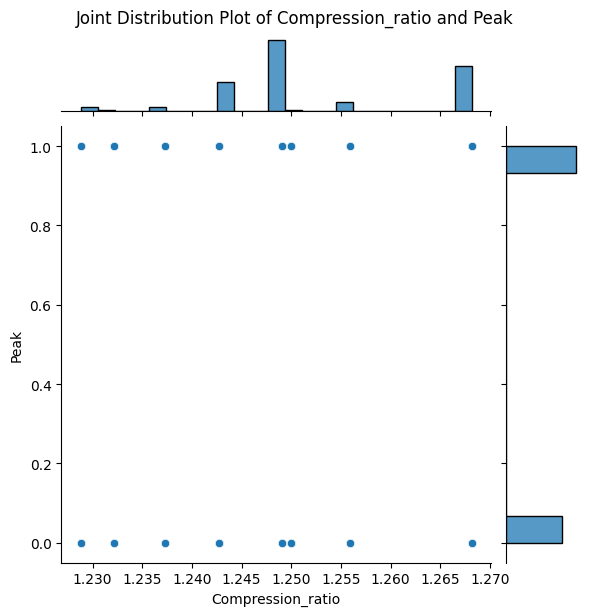

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the data loaded into a DataFrame called df
selected_parameters = ["Amplitude", "Res_Freq", "Compression_ratio", "Peak"]
data_for_visualization = df[selected_parameters].dropna()  # Removing rows with missing values

# Create joint distribution plots for each pair of parameters
sns.jointplot(x="Amplitude", y="Res_Freq", data=data_for_visualization, kind="scatter")
plt.suptitle("Joint Distribution Plot of Amplitude and Res_Freq", y=1.02)
plt.show()

sns.jointplot(x="Amplitude", y="Compression_ratio", data=data_for_visualization, kind="scatter")
plt.suptitle("Joint Distribution Plot of Amplitude and Compression_ratio", y=1.02)
plt.show()

sns.jointplot(x="Amplitude", y="Peak", data=data_for_visualization, kind="scatter")
plt.suptitle("Joint Distribution Plot of Amplitude and Peak", y=1.02)
plt.show()

sns.jointplot(x="Res_Freq", y="Compression_ratio", data=data_for_visualization, kind="scatter")
plt.suptitle("Joint Distribution Plot of Res_Freq and Compression_ratio", y=1.02)
plt.show()

sns.jointplot(x="Res_Freq", y="Peak", data=data_for_visualization, kind="scatter")
plt.suptitle("Joint Distribution Plot of Res_Freq and Peak", y=1.02)
plt.show()

sns.jointplot(x="Compression_ratio", y="Peak", data=data_for_visualization, kind="scatter")
plt.suptitle("Joint Distribution Plot of Compression_ratio and Peak", y=1.02)
plt.show()


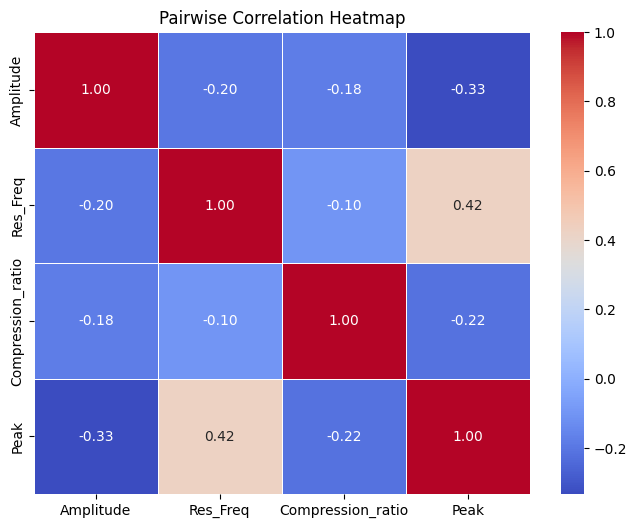

In [48]:
# Calculate the pairwise correlation matrix
pairwise_correlation_matrix = data_for_visualization.corr()

# Create a heatmap for the pairwise correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(pairwise_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Pairwise Correlation Heatmap")
plt.show()


C:\Users\maxim\AppData\Local\Temp\ipykernel_18312\2304792025.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_for_visualization["Amplitude"], label="Amplitude", shade=True)
C:\Users\maxim\AppData\Local\Temp\ipykernel_18312\2304792025.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_for_visualization["Res_Freq"], label="Res_Freq", shade=True)
C:\Users\maxim\AppData\Local\Temp\ipykernel_18312\2304792025.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_for_visualization["Compression_ratio"], label="Compression_ratio", shade=True)
C:\Users\maxim\AppData\Local\Temp\ipykernel_18312\230479

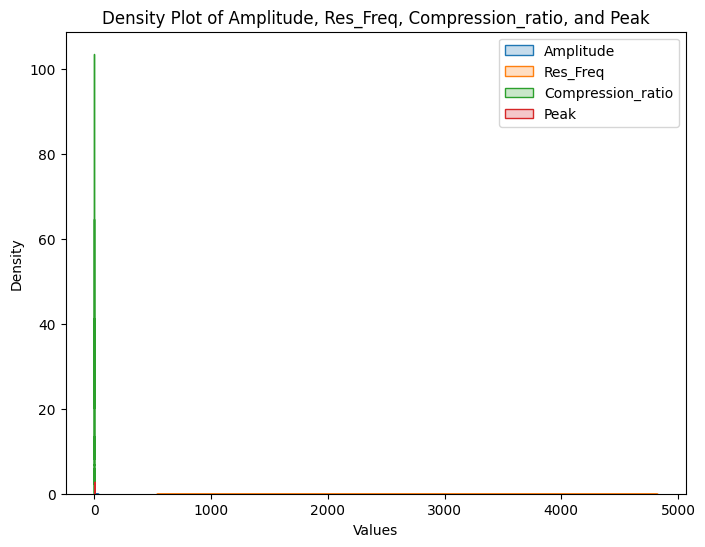

In [49]:
# Create density plots for each parameter
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data_for_visualization["Amplitude"], label="Amplitude", shade=True)
sns.kdeplot(data=data_for_visualization["Res_Freq"], label="Res_Freq", shade=True)
sns.kdeplot(data=data_for_visualization["Compression_ratio"], label="Compression_ratio", shade=True)
sns.kdeplot(data=data_for_visualization["Peak"], label="Peak", shade=True)
plt.title("Density Plot of Amplitude, Res_Freq, Compression_ratio, and Peak")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()
plt.show()


c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


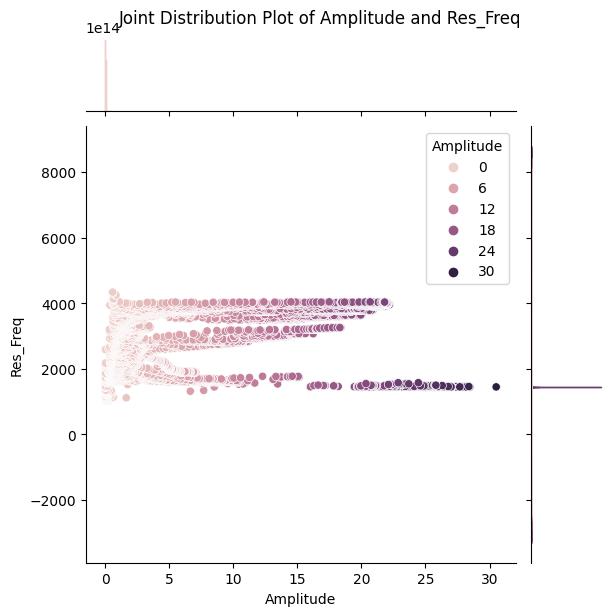

c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


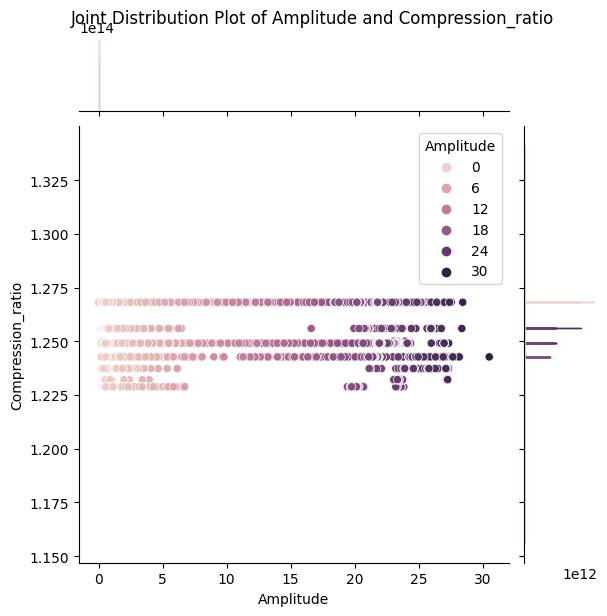

c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


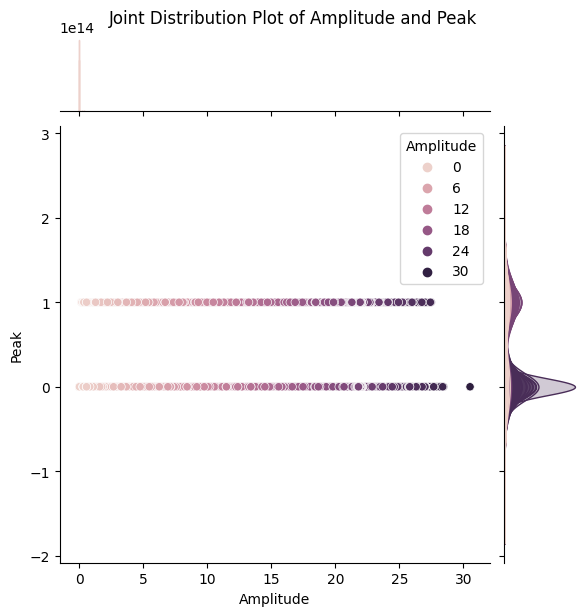

c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


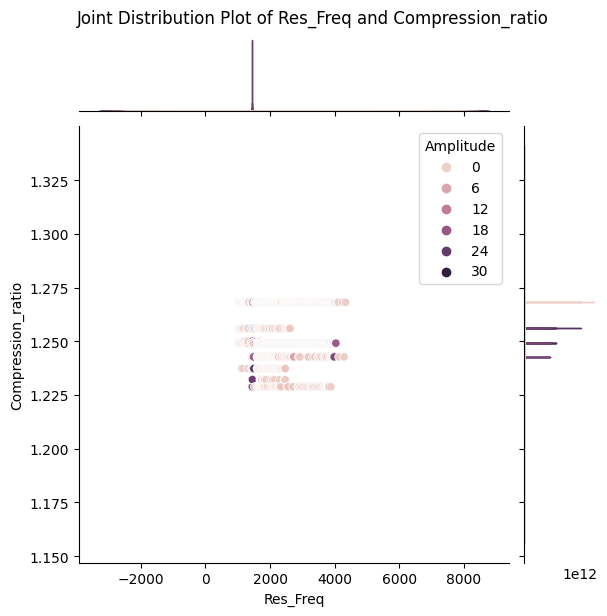

c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


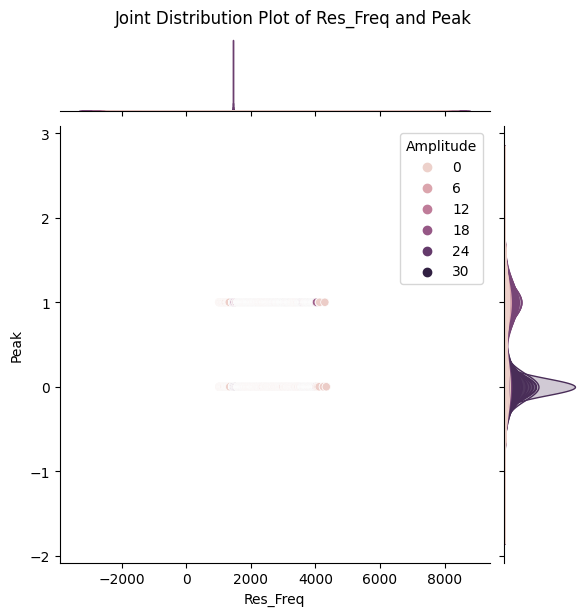

c:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


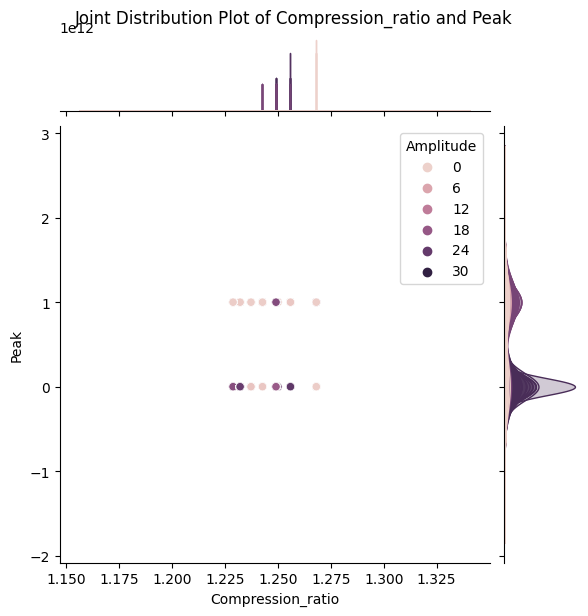

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the data loaded into a DataFrame called df
selected_parameters = ["Amplitude", "Res_Freq", "Compression_ratio", "Peak"]
data_for_visualization = df[selected_parameters].dropna()  # Removing rows with missing values

# Create joint distribution plots for each pair of parameters with color based on Amplitude
sns.jointplot(x="Amplitude", y="Res_Freq", data=data_for_visualization, kind="scatter", hue="Amplitude", cmap="viridis")
plt.suptitle("Joint Distribution Plot of Amplitude and Res_Freq", y=1.02)
plt.show()

sns.jointplot(x="Amplitude", y="Compression_ratio", data=data_for_visualization, kind="scatter", hue="Amplitude", cmap="viridis")
plt.suptitle("Joint Distribution Plot of Amplitude and Compression_ratio", y=1.02)
plt.show()

sns.jointplot(x="Amplitude", y="Peak", data=data_for_visualization, kind="scatter", hue="Amplitude", cmap="viridis")
plt.suptitle("Joint Distribution Plot of Amplitude and Peak", y=1.02)
plt.show()

sns.jointplot(x="Res_Freq", y="Compression_ratio", data=data_for_visualization, kind="scatter", hue="Amplitude", cmap="viridis")
plt.suptitle("Joint Distribution Plot of Res_Freq and Compression_ratio", y=1.02)
plt.show()

sns.jointplot(x="Res_Freq", y="Peak", data=data_for_visualization, kind="scatter", hue="Amplitude", cmap="viridis")
plt.suptitle("Joint Distribution Plot of Res_Freq and Peak", y=1.02)
plt.show()

sns.jointplot(x="Compression_ratio", y="Peak", data=data_for_visualization, kind="scatter", hue="Amplitude", cmap="viridis")
plt.suptitle("Joint Distribution Plot of Compression_ratio and Peak", y=1.02)
plt.show()


MSE :  57.77382396920745
RMSE :  7.600909417247876
R2 :  0.30824009448218015


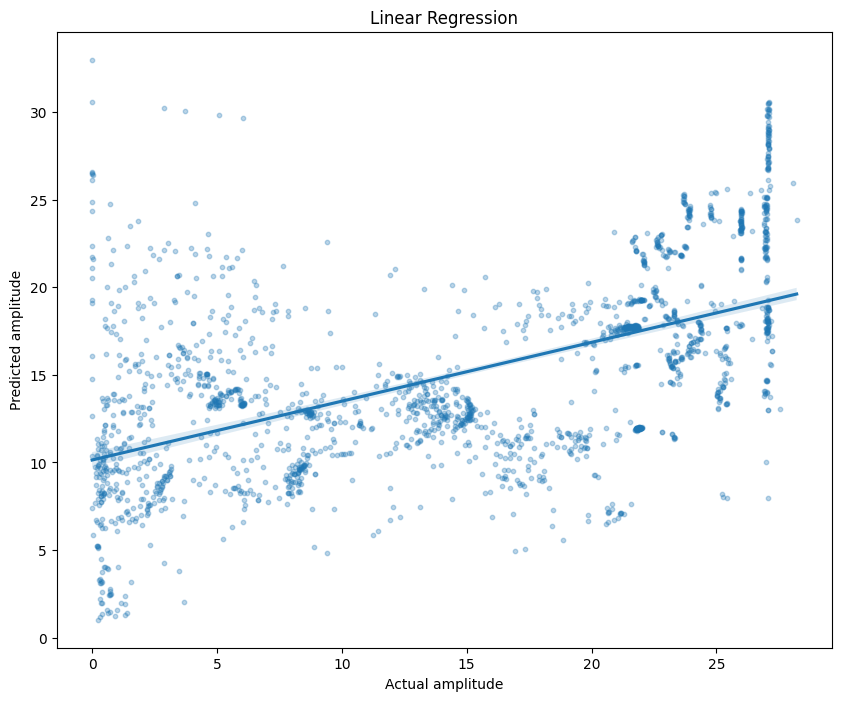

In [54]:
# plot correlation by machine learning 
# 1. Linear Regression
# 2. Random Forest
# 3. XGBoost
# 4. LightGBM
# 5. CatBoost

# first : linear regression

# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# import data

data = pd.read_csv('cleaned_data.csv')

# split data into train and test

from sklearn.model_selection import train_test_split

X = data.drop(['Amplitude'], axis = 1)
y = data['Amplitude']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2021)

# linear regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# predict

y_pred = lr.predict(X_test)

# evaluation

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE : ', mse)
print('RMSE : ', rmse)
print('R2 : ', r2)

# plot

plt.figure(figsize = (10, 8))
sns.regplot(x = y_test, y = y_pred, scatter_kws = {'s' : 10, 'alpha' : 0.3})
plt.xlabel('Actual amplitude')
plt.ylabel('Predicted amplitude')
plt.title('Linear Regression')
plt.show()


MSE :  751974.5994670425
RMSE :  867.1646899332575
R2 :  0.2937520987107525


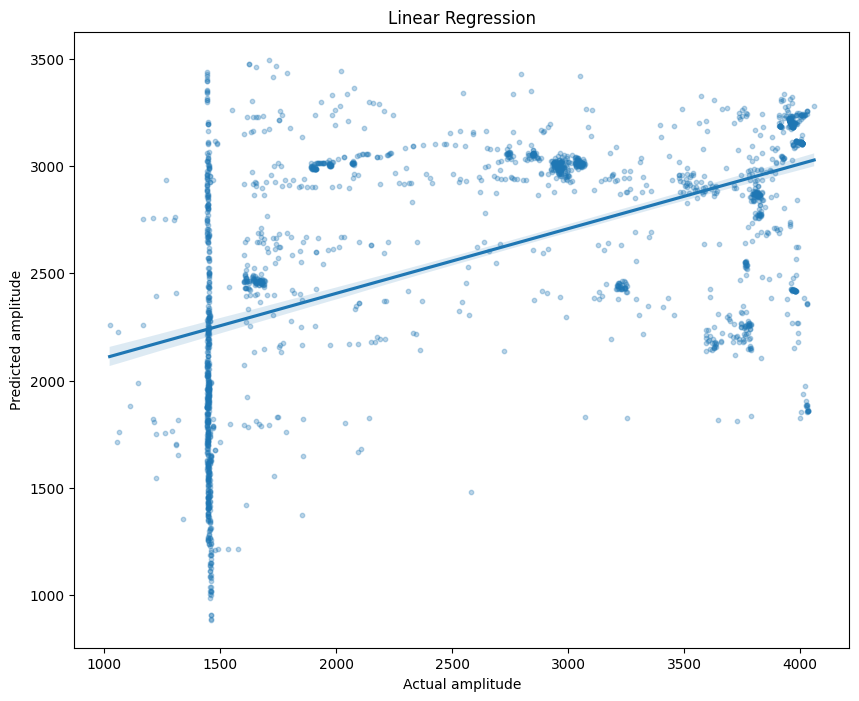

In [56]:
# plot correlation by machine learning 
# 1. Linear Regression
# 2. Random Forest
# 3. XGBoost
# 4. LightGBM
# 5. CatBoost

# first : linear regression

# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# import data

data = pd.read_csv('cleaned_data.csv')

# split data into train and test

from sklearn.model_selection import train_test_split

X = data.drop(['Res_Freq'], axis = 1)
y = data['Res_Freq']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2021)

# linear regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# predict

y_pred = lr.predict(X_test)

# evaluation

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE : ', mse)
print('RMSE : ', rmse)
print('R2 : ', r2)

# plot

plt.figure(figsize = (10, 8))
sns.regplot(x = y_test, y = y_pred, scatter_kws = {'s' : 10, 'alpha' : 0.3})
plt.xlabel('Actual amplitude')
plt.ylabel('Predicted amplitude')
plt.title('Linear Regression')
plt.show()


ValueError: Unknown label type: 'continuous'

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_time_resonance_frequency(data_df, Sample_number):
    group_data = data_df[data_df["Sample_number"] == Sample_number]

    plt.figure(figsize=(10, 6))
    sns.lineplot(x="time", y="res_freq", data=group_data, marker='o', label=f"Sample {Sample_number}")
    plt.xlabel("Time")
    plt.ylabel("Resonance Frequency")
    plt.title(f"Time and Resonance Frequency for Sample {Sample_number}")
    plt.legend()
    plt.show()

def main():
    # Load data from cleaned_data.csv into a DataFrame
    data_df = pd.read_csv("cleaned_data.csv")

    # Group by "sample_number" and plot time and resonance frequency for each group
    unique_sample_numbers = data_df["Sample_number"].unique()
    for sample_number in unique_sample_numbers:
        plot_time_resonance_frequency(data_df, sample_number)

if __name__ == "__main__":
    main()


ValueError: Could not interpret value `time` for parameter `x`

<Figure size 1000x600 with 0 Axes>